## <b> Data Description </b>
***Overview***: This case requires you to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.


*   Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
  *   Monthly average purchase and cash advance amount
  *   Purchases by type (one-off, installments)
  *   Average amount per purchase and cash advance transaction,
  *   Limit usage (balance to credit limit ratio),
  *   Payments to minimum payments ratio etc (think of more types of similar analysis)


*   Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
*   Identification of the relationships/ affinities between services.

*   Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioral segments of credit card holders
*   Identify cluster characteristics of the cluster using detailed profiling.
*   Provide the strategic insights and implementation of strategies for given set of cluster characteristics



## <b> Data Description </b>
* ### CUST_ID: Credit card holder ID
* ### BALANCE: Monthly average balance (based on daily balance averages)
* ### BALANCE_FREQUENCY: Ratio of last 12 months with balance
* ### PURCHASES: Total purchase amount spent during last 12 months
* ### ONEOFF_PURCHASES: Total amount of one-off purchases
* ### INSTALLMENTS_PURCHASES: Total amount of installment purchases
* ### CASH_ADVANCE: Total cash-advance amount
* ### PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)
* ### ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases 
* ### PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
* ### CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
* ### CASH_ADVANCE_TRX: Average amount per cash-advance transaction
* ### PURCHASES_TRX: Average amount per purchase transaction
* ### CREDIT_LIMIT: Credit limit
* ### PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
* ### MINIMUM_PAYMENTS: Total minimum payments due in the period.
* ### PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance
* ### TENURE: Number of months as a customer

In [4]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Settings
# pd.set_option('display.max_columns', None)

In [5]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#load the seol bike data set from drive
df=pd.read_csv('Data_problem  1.csv')


# **Understand More About The Data**

##summary of data

In [7]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [8]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [9]:
# View the data of bottom 5 rows to take a glimps of the data
df.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [10]:
#Getting the shape of dataset with rows and columns
print(df.shape)

(8950, 18)


In [11]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [12]:

#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [13]:
#print the unique value
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [14]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

* ***This Dataset contains 8950 lines and 18 columns.*** 


# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first*** 

##Missing values

In [15]:
#check for count of missing values in each column.
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

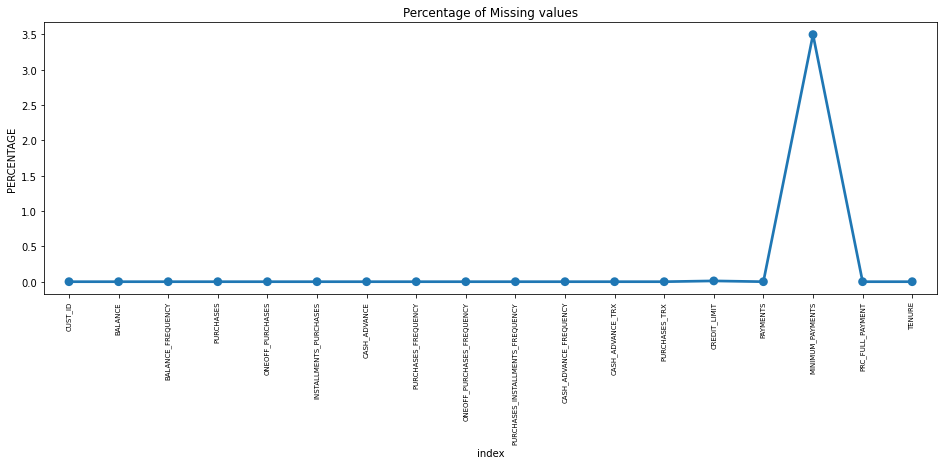

In [16]:
#Plotting missing values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* ***As we can see there are a missing values in the columns CREDIT_LIMIT and MINIMUM_PAYMENTS***

##Null value treatment

In [17]:
df.drop('CUST_ID', axis = 1, inplace = True)

In [18]:
print(df["CREDIT_LIMIT"].unique().max(), df["MINIMUM_PAYMENTS"].unique().max())

nan nan


In [19]:
# Fixing the NA values with median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [20]:
df_org = df.copy()

In [21]:
df['CREDIT_LIMIT']

0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64

##Duplicate values

**Why is it important to remove duplicate records from my data?** 
* "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.***

In [22]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after counting the duplicate value we came to know that there are no duplicate value present.***

**3.3 Identifying Outliers in the dataset**


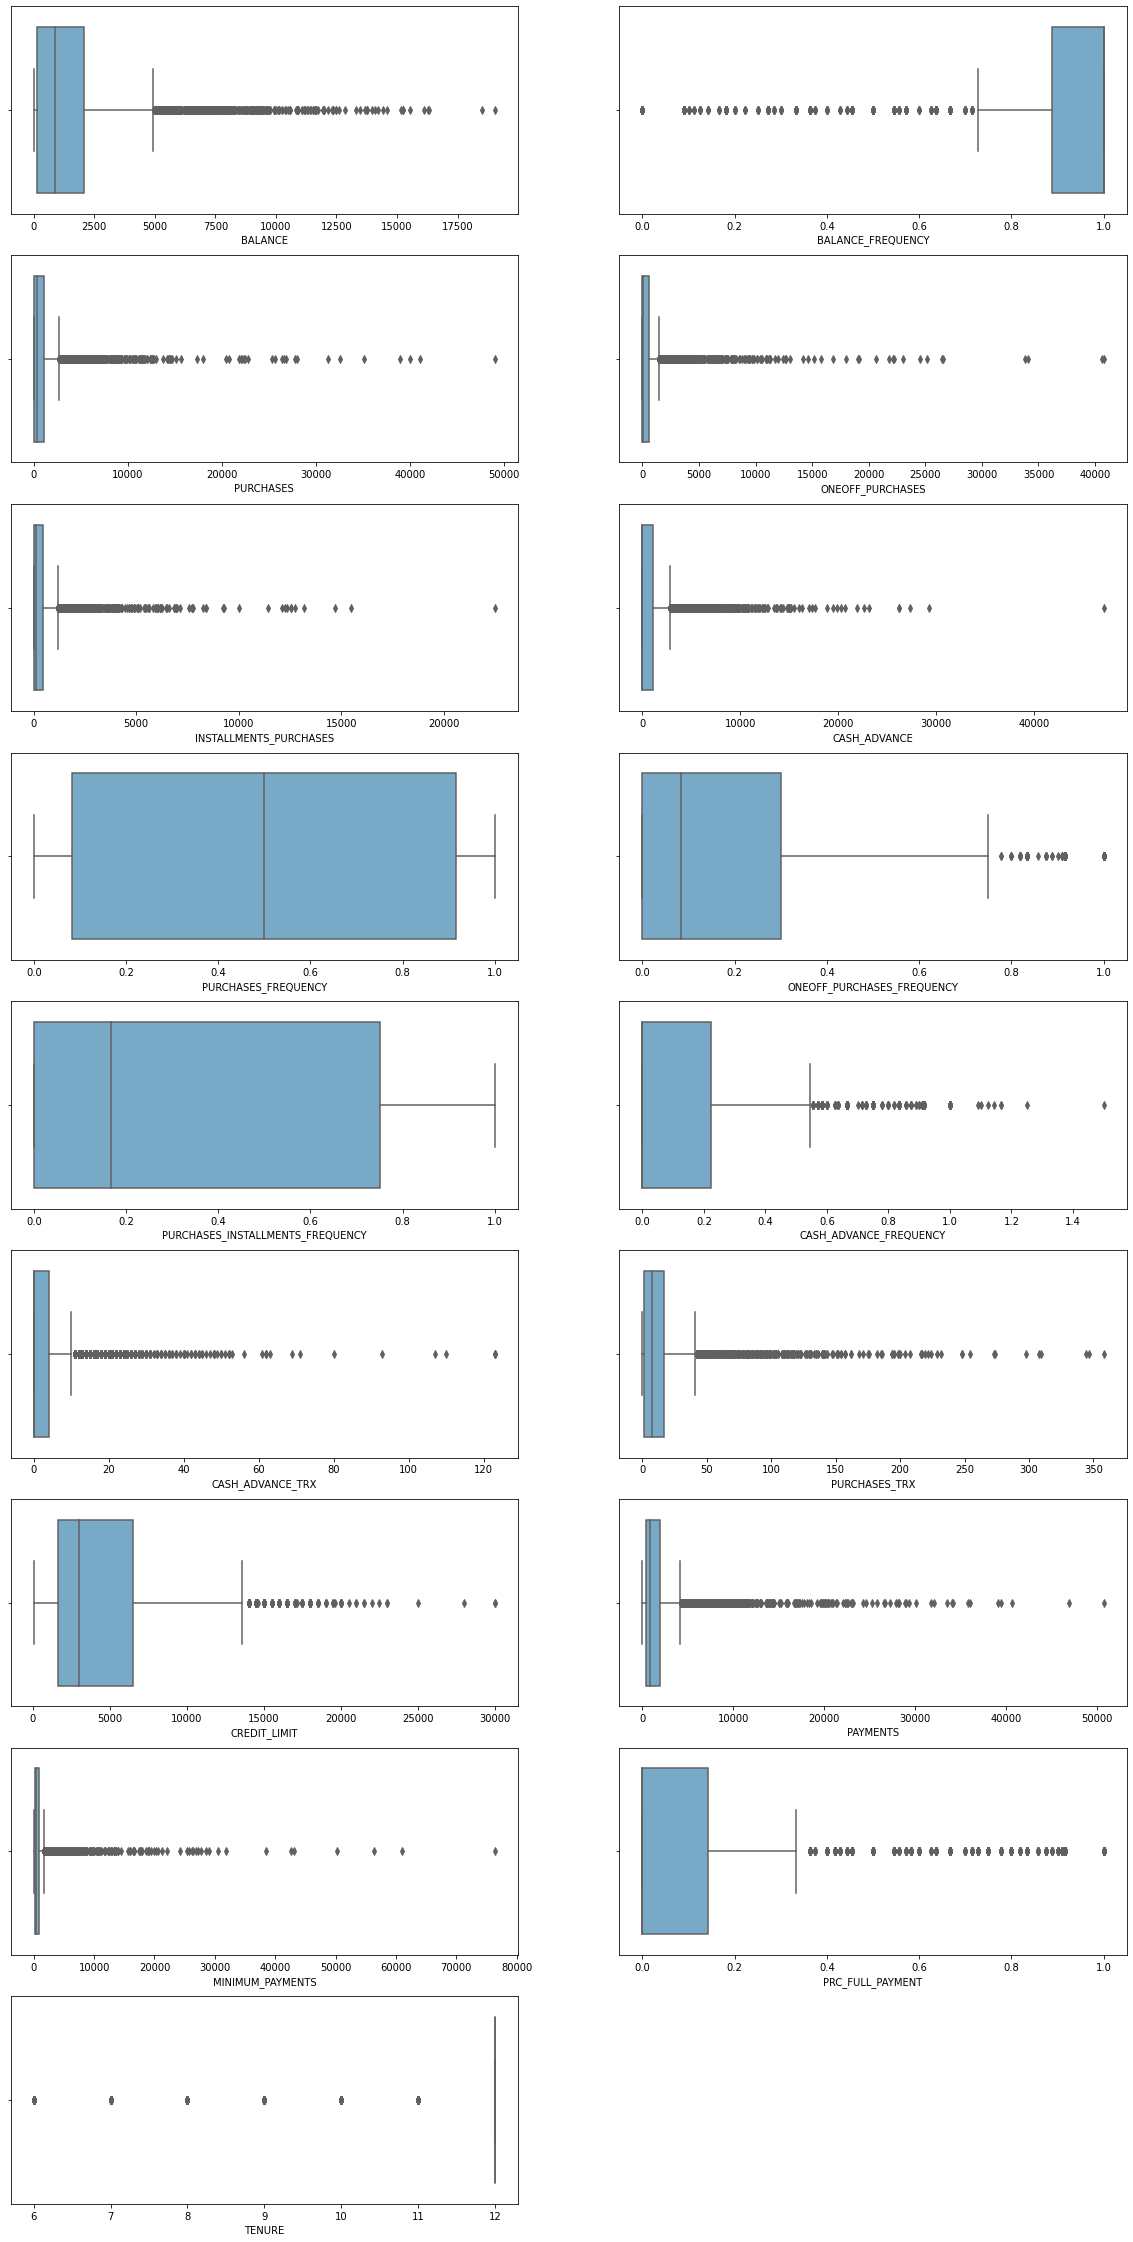

In [23]:
# plot the boxplots of the numerical features
count = 1
plt.subplots(figsize=(20,45))
for col in df:
  plt.subplot(10,2,count)
  sns.boxplot(df[col], palette='Blues')
  # plt.title(f"Boxplot for the variable {col}", fontsize=13)
  plt.xlabel(f"{col}")
  count += 1

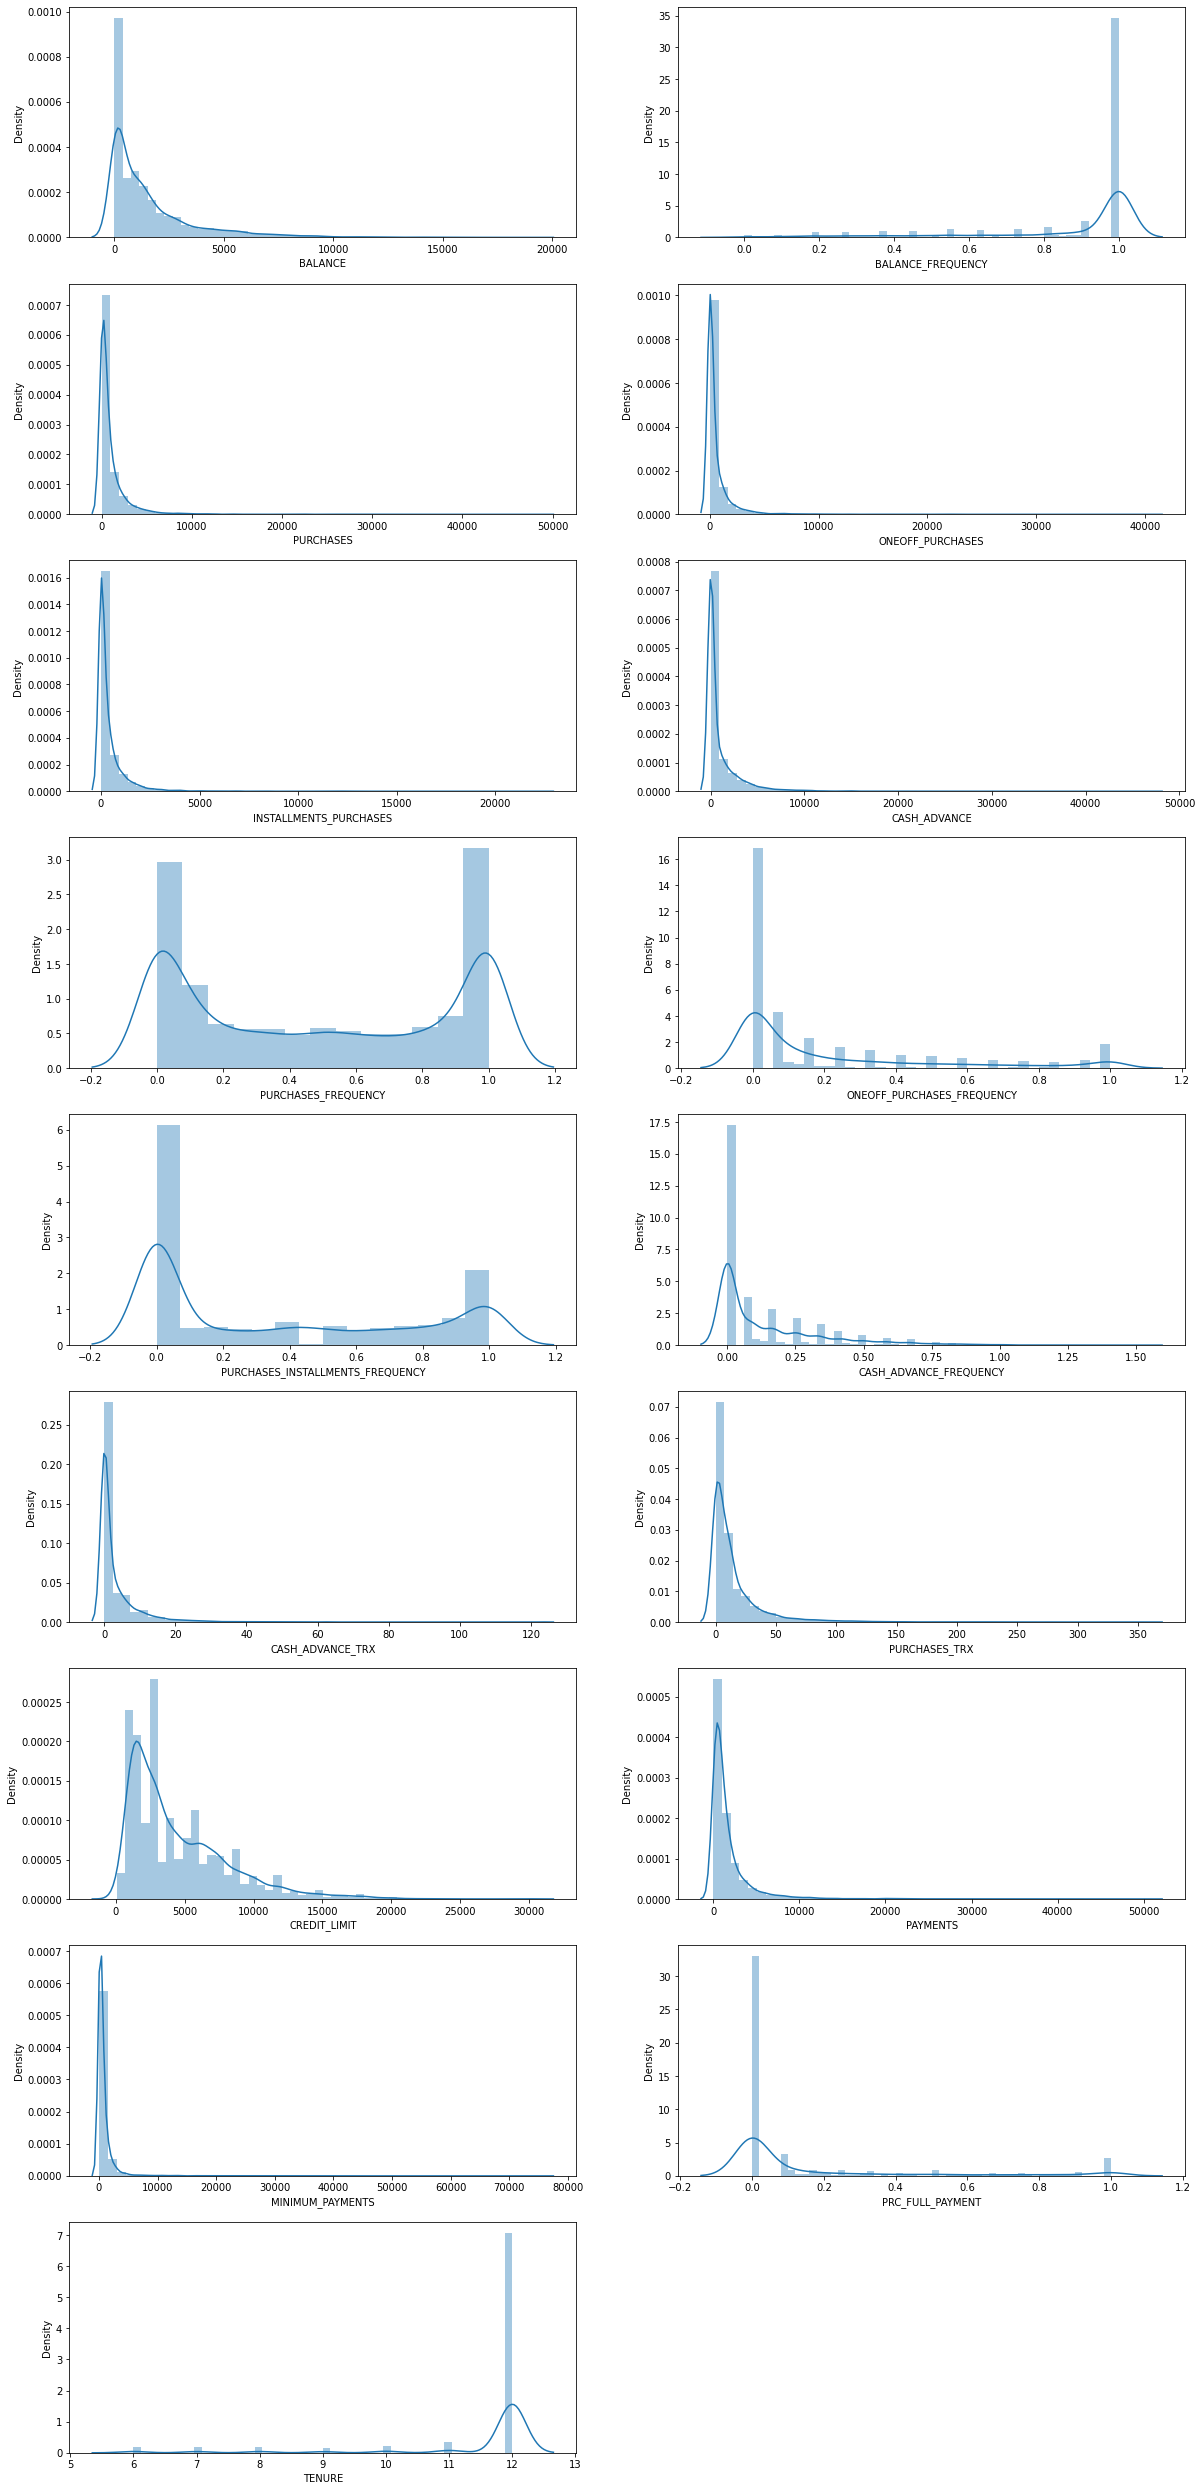

In [24]:
#Cheching the distibution of the data
count = 1
plt.subplots(figsize=(20,45))
for col in df:
  plt.subplot(9,2,count)
  sns.distplot(df[col])
  # plt.title(f"Distplot for the variable {col}", fontsize=13)
  plt.xlabel(f"{col}")
  count += 1

# **Exploratory Data Analysis Of The Data Set**

***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

In [25]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [26]:
# Creating features
df['MONTHLY_AVG_PURCHASE'] = df['PURCHASES']/df['TENURE'] # calculate monthly average purchase
df['MONTHLY_AVG_CASH_ADVANCE'] = df['CASH_ADVANCE']/df['TENURE'] # calculate monthly average cash advance
df['AVG_AMT_PER_PURCHASE'] = df['PURCHASES']/df['PURCHASES_TRX'] # calculate average purchase transaction
df['AVG_CASH_ADVANCE_TRANSACTION'] = df['CASH_ADVANCE']/df['CASH_ADVANCE_TRX'] # calculate average cash advance transaction
df['LIMIT_USAGE'] = df['BALANCE']/df['CREDIT_LIMIT'] # calculate limit usage
df['PAYMENTS_TO_MIN_PAYMENTS_RATIO'] = df['PAYMENTS']/df['MINIMUM_PAYMENTS'] # calculate payments to minimum payments ratio
df['PURCHASE_TYPE'] = ''
df.loc[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0), 'PURCHASE_TYPE'] = 'none'
df.loc[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0), 'PURCHASE_TYPE'] = 'one-off'
df.loc[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0), 'PURCHASE_TYPE'] = 'installment'
df.loc[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0), 'PURCHASE_TYPE'] = 'both'
df['ONEOFF_PURCHASES_RATIO'] = df['ONEOFF_PURCHASES']/df['PURCHASES'] # calculate one-off purchases ratio
df['INSTALLMENTS_PURCHASES_RATIO'] = df['INSTALLMENTS_PURCHASES']/df['PURCHASES'] # calculate installment purchases ratio

####MONTHLY_AVG_PURCHASE

In [27]:
df['MONTHLY_AVG_PURCHASE'].value_counts()

0.000000      2044
3.804167        25
12.500000       14
5.000000        13
50.000000       13
              ... 
106.715000       1
87.146667        1
9.837500         1
366.666667       1
182.208333       1
Name: MONTHLY_AVG_PURCHASE, Length: 6289, dtype: int64

####MONTHLY_AVG_CASH_ADVANCE

In [28]:
df['MONTHLY_AVG_CASH_ADVANCE'].value_counts()

0.000000      4628
41.285486        1
123.853608       1
71.269398        1
313.925392       1
              ... 
432.252486       1
11.479788        1
10.411776        1
22.713280        1
21.173335        1
Name: MONTHLY_AVG_CASH_ADVANCE, Length: 4323, dtype: int64

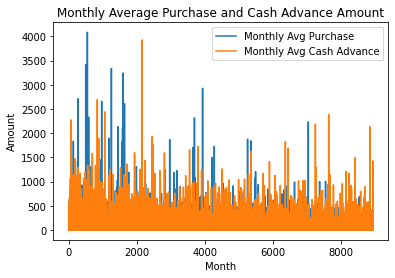

In [29]:
plt.plot(df['MONTHLY_AVG_PURCHASE'], label='Monthly Avg Purchase')
plt.plot(df['MONTHLY_AVG_CASH_ADVANCE'], label='Monthly Avg Cash Advance')
plt.legend()
plt.title('Monthly Average Purchase and Cash Advance Amount')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

####AVG_AMT_PER_PURCHASE

In [30]:
df['AVG_AMT_PER_PURCHASE'].value_counts()

50.000000     30
45.650000     27
60.000000     22
100.000000    17
25.000000     16
              ..
134.803333     1
81.253571      1
388.333333     1
12.405000      1
47.532609      1
Name: AVG_AMT_PER_PURCHASE, Length: 6193, dtype: int64

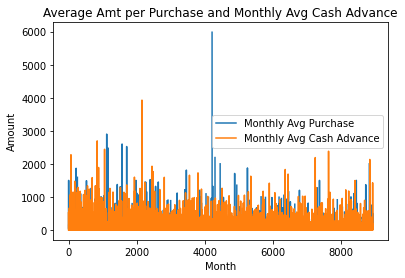

In [31]:
#Average Amount Per Purchase
plt.plot(df['AVG_AMT_PER_PURCHASE'], label='Monthly Avg Purchase')
plt.plot(df['MONTHLY_AVG_CASH_ADVANCE'], label='Monthly Avg Cash Advance')
plt.legend()
plt.title('Average Amt per Purchase and Monthly Avg Cash Advance')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

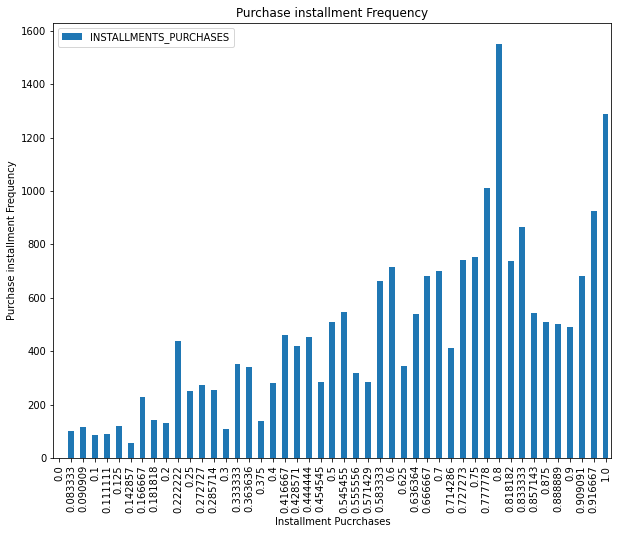

In [32]:
# Calculate the average amount per purchase and cash advance transaction
avg_amount = df.groupby("PURCHASES_INSTALLMENTS_FREQUENCY").agg({"INSTALLMENTS_PURCHASES": "mean"})
# Plot the average amount per purchase and cash advance transaction
avg_amount.plot(kind="bar", figsize=(10,8))
plt.title("Purchase installment Frequency")
plt.xlabel("Installment Pucrchases")
plt.ylabel("Purchase installment Frequency")
plt.show()

####AVG_CASH_ADVANCE_TRANSACTION

In [33]:
df['AVG_CASH_ADVANCE_TRANSACTION'].value_counts()

1610.736371    1
61.928229      1
297.248659     1
427.616390     1
150.684188     1
              ..
137.757459     1
124.941315     1
272.559361     1
252.707707     1
63.520004      1
Name: AVG_CASH_ADVANCE_TRANSACTION, Length: 4322, dtype: int64

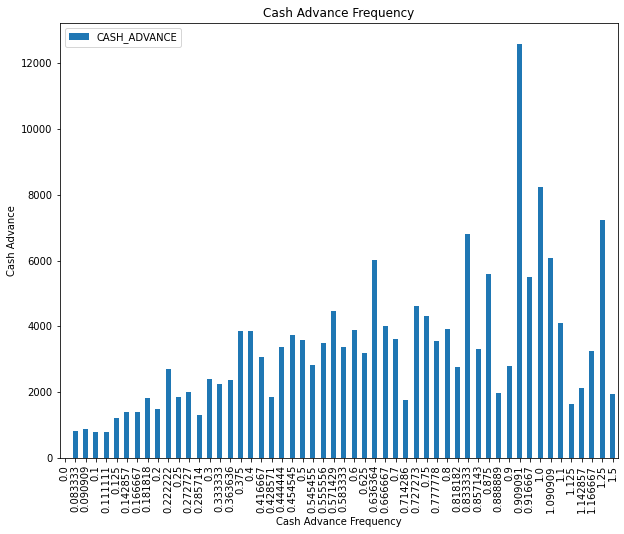

In [34]:
# Calculate the average amount per purchase and cash advance transaction
CASH_ADVANCE_AMT = df.groupby("CASH_ADVANCE_FREQUENCY").agg({"CASH_ADVANCE": "mean"})
# Plot the average amount per purchase and cash advance transaction
CASH_ADVANCE_AMT.plot(kind="bar", figsize=(10,8))
plt.title("Cash Advance Frequency")
plt.xlabel("Cash Advance Frequency")
plt.ylabel("Cash Advance")
plt.show()

####Limit_usage (balance to credit limit ratio ) credit card utilization
Lower value implies that the cutomers are maintaing their balance properly.

In [35]:
df['LIMIT_USAGE'].value_counts()

0.000000    80
0.040901     1
0.173364     1
0.835459     1
0.632287     1
            ..
0.732597     1
0.580101     1
0.601312     1
0.844361     1
0.310590     1
Name: LIMIT_USAGE, Length: 8871, dtype: int64

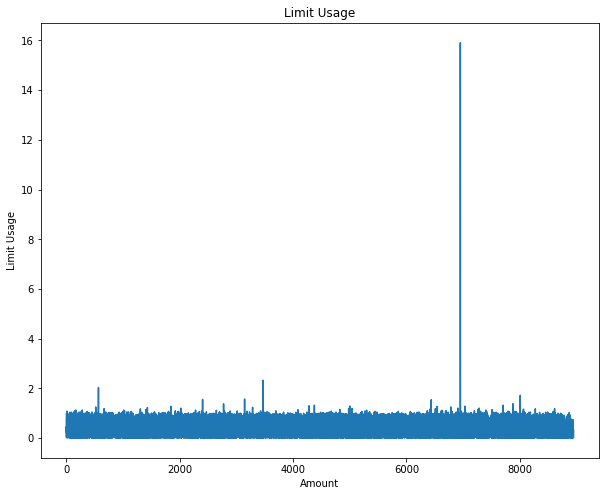

In [36]:
# Plot the limit usage
df["LIMIT_USAGE"].plot(kind="line", figsize=(10,8))
plt.title("Limit Usage")
plt.xlabel("Amount")
plt.ylabel("Limit Usage")
plt.show()

####PAYMENTS_TO_MIN_PAYMENTS_RATIO

In [37]:
df['PAYMENTS_TO_MIN_PAYMENTS_RATIO'].value_counts()

0.000000      240
1.446508        1
0.703354        1
2.355655        1
34.775154       1
             ... 
304.398090      1
54.280767       1
3.044989        1
2.462889        1
0.715439        1
Name: PAYMENTS_TO_MIN_PAYMENTS_RATIO, Length: 8711, dtype: int64

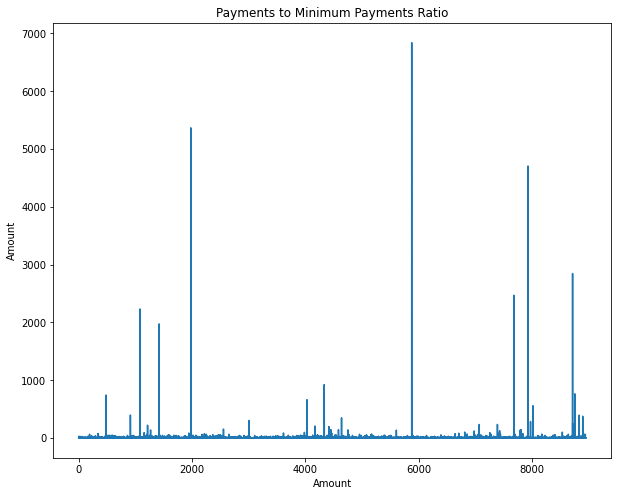

In [38]:
# Plot the payments to minimum payments ratio
df["PAYMENTS_TO_MIN_PAYMENTS_RATIO"].plot(kind="line", figsize=(10,8))
plt.title("Payments to Minimum Payments Ratio")
plt.xlabel("Amount")
plt.ylabel("Amount")
plt.show()

####PURCHASE_TYPE

In [39]:
df['PURCHASE_TYPE'].value_counts()

both           2774
installment    2260
none           2042
one-off        1874
Name: PURCHASE_TYPE, dtype: int64

[Text(0.5, 1.0, 'Value Count by Purchase Type')]

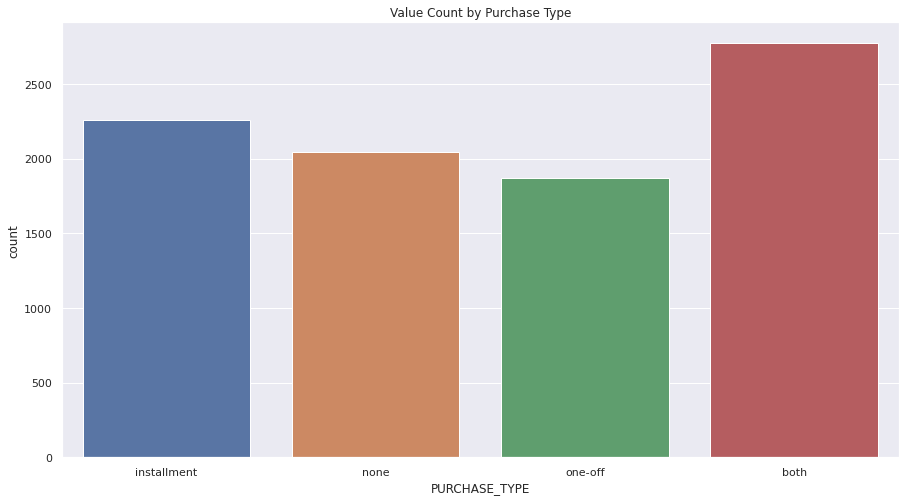

In [40]:
#anlysis of Purchase type
sns.set()
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(df['PURCHASE_TYPE'])
ax.set(title='Value Count by Purchase Type')

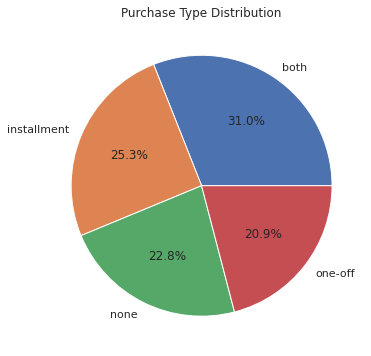

In [41]:
#plotting piechart to understand the distribution of purchase type
purchase_type_count = df['PURCHASE_TYPE'].value_counts()
labels = purchase_type_count.index
sizes = purchase_type_count.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Purchase Type Distribution')
plt.show()

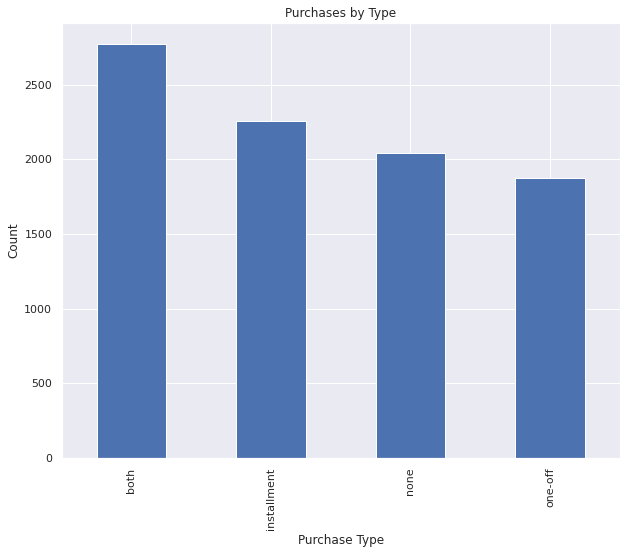

In [42]:
# Group purchases by type (one-off, installments)
purchases_by_type = df.groupby("PURCHASE_TYPE").size()

# Plot the purchases by type
purchases_by_type.plot(kind="bar", figsize=(10,8))
plt.title("Purchases by Type")
plt.xlabel("Purchase Type")
plt.ylabel("Count")
plt.show()

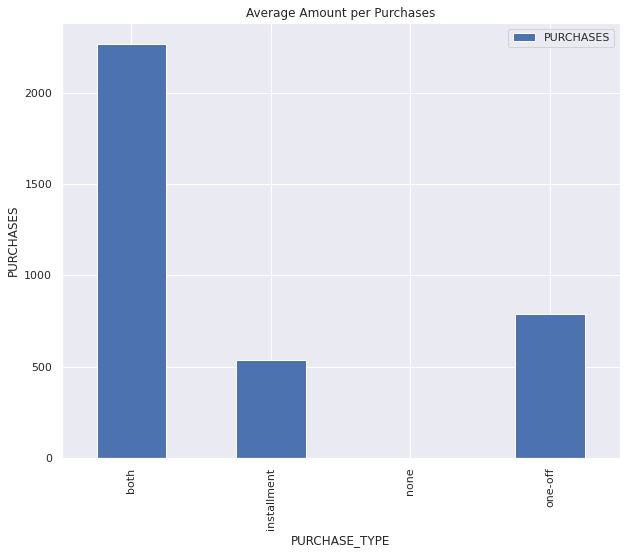

In [43]:
# Calculate the average amount per purchase and cash advance transaction
avg_amount = df.groupby("PURCHASE_TYPE").agg({"PURCHASES": "mean"})
# Plot the average amount per purchase and cash advance transaction
avg_amount.plot(kind="bar", figsize=(10,8))
plt.title("Average Amount per Purchases")
plt.xlabel("PURCHASE_TYPE")
plt.ylabel("PURCHASES")
plt.show()

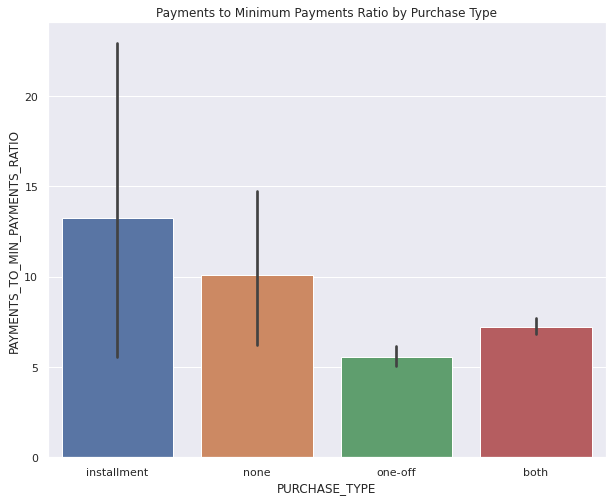

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x='PURCHASE_TYPE', y='PAYMENTS_TO_MIN_PAYMENTS_RATIO', data=df)
plt.title('Payments to Minimum Payments Ratio by Purchase Type')
plt.show()

####ONEOFF_PURCHASES_RATIO

In [45]:
df['ONEOFF_PURCHASES_RATIO'].value_counts()

0.000000    2258
1.000000    1872
0.333333       3
0.400000       2
0.555556       2
            ... 
0.907367       1
0.566596       1
0.815195       1
0.638203       1
0.412556       1
Name: ONEOFF_PURCHASES_RATIO, Length: 2772, dtype: int64

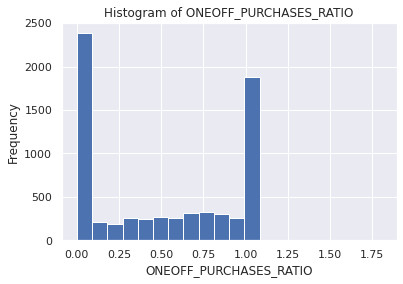

In [46]:
# #anlysis of Purchase type
plt.hist(df['ONEOFF_PURCHASES_RATIO'], bins=20)
plt.xlabel('ONEOFF_PURCHASES_RATIO')
plt.ylabel('Frequency')
plt.title('Histogram of ONEOFF_PURCHASES_RATIO')
plt.show()

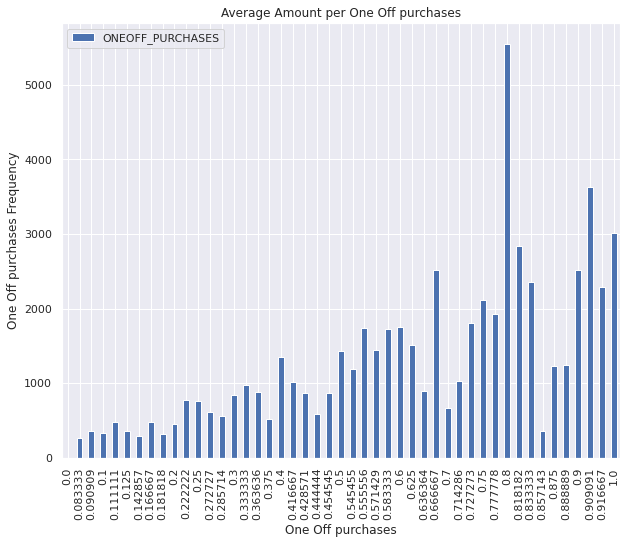

In [47]:
# Calculate the average amount per purchase and cash advance transaction
avg_amount = df.groupby("ONEOFF_PURCHASES_FREQUENCY").agg({"ONEOFF_PURCHASES": "mean"})
# Plot the average amount per purchase and cash advance transaction
avg_amount.plot(kind="bar", figsize=(10,8))
plt.title("Average Amount per One Off purchases")
plt.xlabel("One Off purchases")
plt.ylabel("One Off purchases Frequency")
plt.show()

####INSTALLMENTS_PURCHASES_RATIO

In [48]:
df['INSTALLMENTS_PURCHASES_RATIO'].value_counts()

1.000000    2246
0.000000    1874
0.666667       3
0.600000       2
0.444444       2
            ... 
0.433404       1
0.184805       1
0.361797       1
0.726234       1
0.587444       1
Name: INSTALLMENTS_PURCHASES_RATIO, Length: 2783, dtype: int64

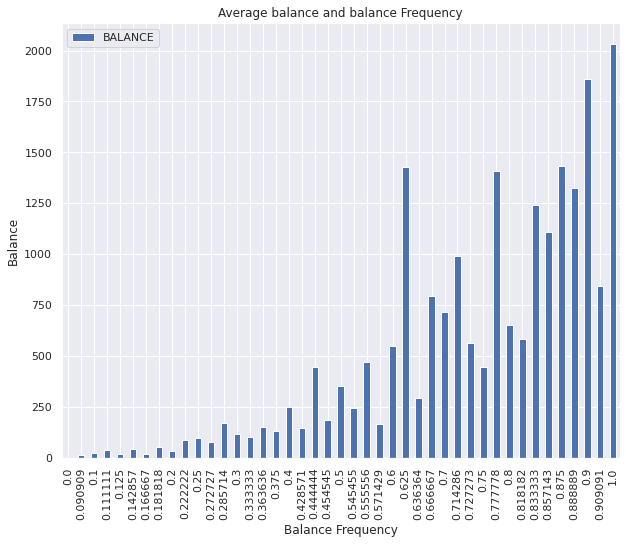

In [49]:
# Calculate the average amount per purchase and cash advance transaction
BALANCE_AMT = df.groupby("BALANCE_FREQUENCY").agg({"BALANCE": "mean"})
# Plot the average amount per purchase and cash advance transaction
BALANCE_AMT.plot(kind="bar", figsize=(10,8))
plt.title("Average balance and balance Frequency")
plt.xlabel("Balance Frequency")
plt.ylabel("Balance")
plt.show()

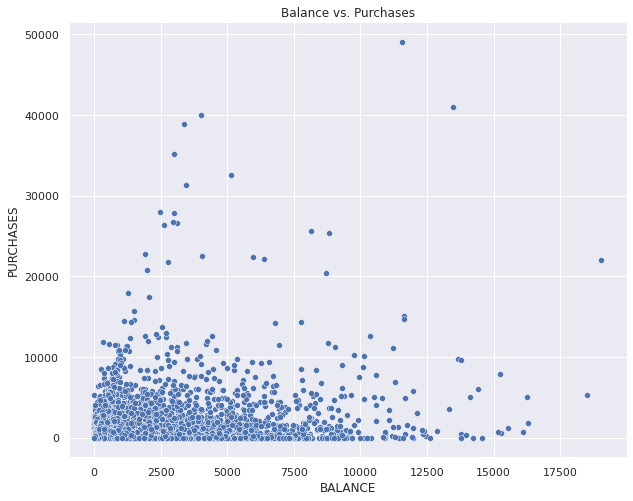

In [50]:
#Balance vs. Purchases
plt.figure(figsize=(10,8))
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df)
plt.title('Balance vs. Purchases')
plt.show()

<Figure size 1080x576 with 0 Axes>

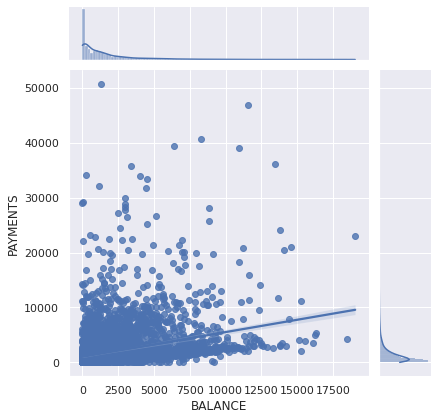

In [51]:
#Balance vs. Payments
plt.figure(figsize=(15,8))
sns.jointplot(x='BALANCE', y='PAYMENTS', data=df, kind='reg')

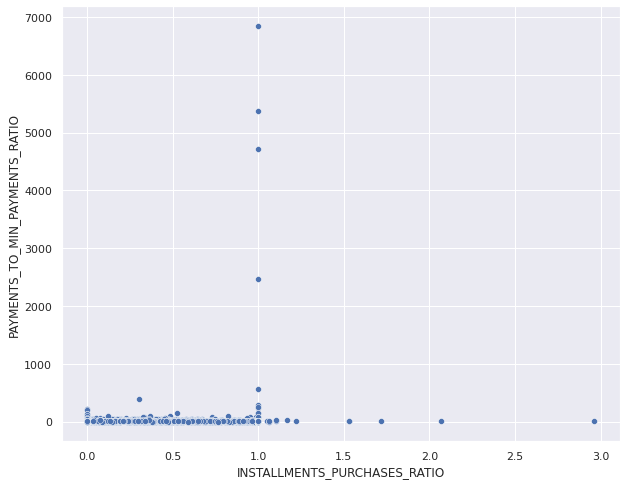

In [52]:
#INSTALLMENTS_PURCHASES_RATIO vs. PAYMENTS_TO_MIN_PAYMENTS_RATIO
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='INSTALLMENTS_PURCHASES_RATIO', y='PAYMENTS_TO_MIN_PAYMENTS_RATIO')
plt.show()

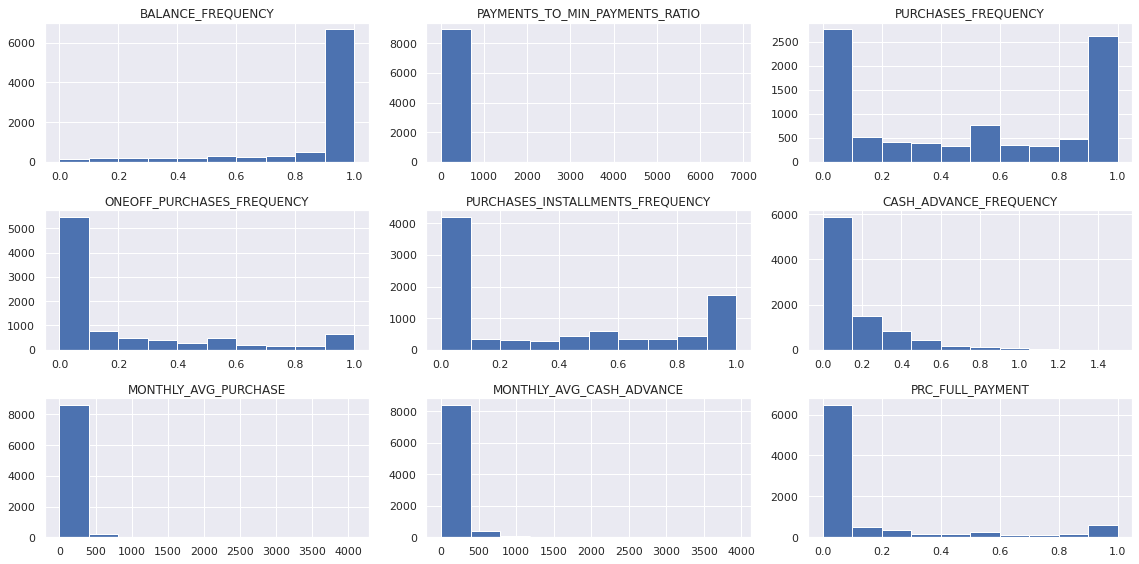

In [53]:
#plotting the KPIs
df[['BALANCE_FREQUENCY','PAYMENTS_TO_MIN_PAYMENTS_RATIO', 
 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
'MONTHLY_AVG_PURCHASE', 'MONTHLY_AVG_CASH_ADVANCE', 'PRC_FULL_PAYMENT']].hist(figsize=(16,8))
plt.tight_layout()

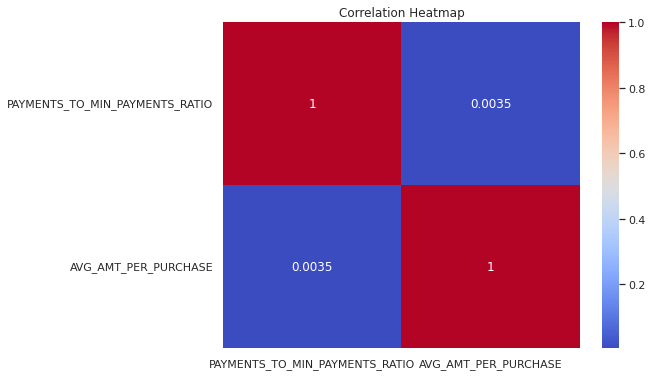

In [54]:
#PAYMENTS TO_MIN PAYMENTS RATIO
plt.figure(figsize=(8, 6))
corr = df[['PAYMENTS_TO_MIN_PAYMENTS_RATIO', 'AVG_AMT_PER_PURCHASE']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

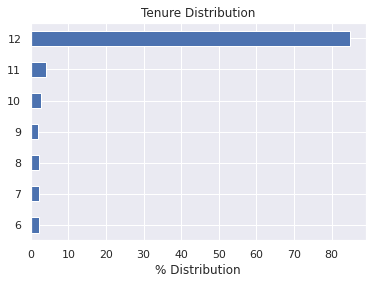

In [55]:
#Tenure wise Distribution
(1e2*df['TENURE'].value_counts().sort_index()/len(df)).plot(kind='barh')
plt.title('Tenure Distribution')
plt.xlabel('% Distribution');

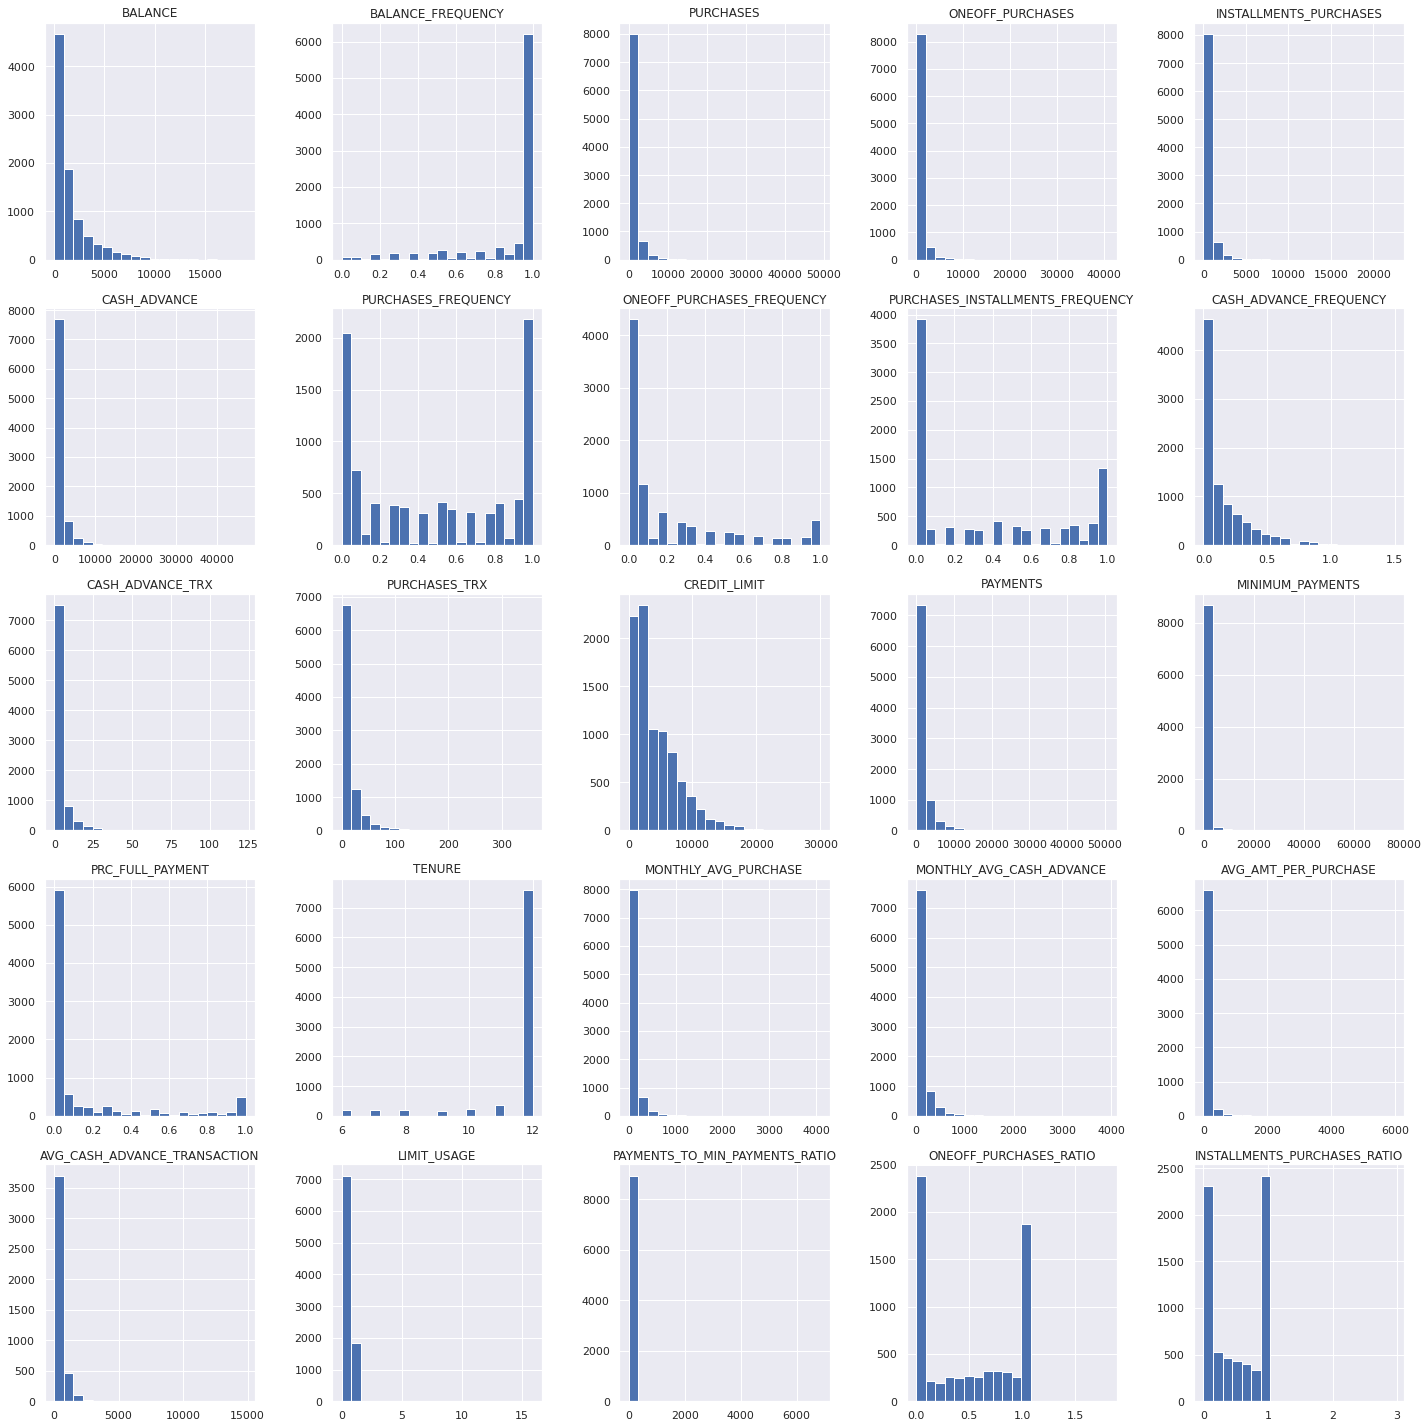

In [56]:
# Plotting all features
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
for i, col in enumerate(numerical_cols.columns):
    ax = axs[i//5, i%5]
    data = numerical_cols[col][np.isfinite(numerical_cols[col])]
    ax.hist(data, bins=20)
    ax.set_title(col)
plt.tight_layout()
plt.show()

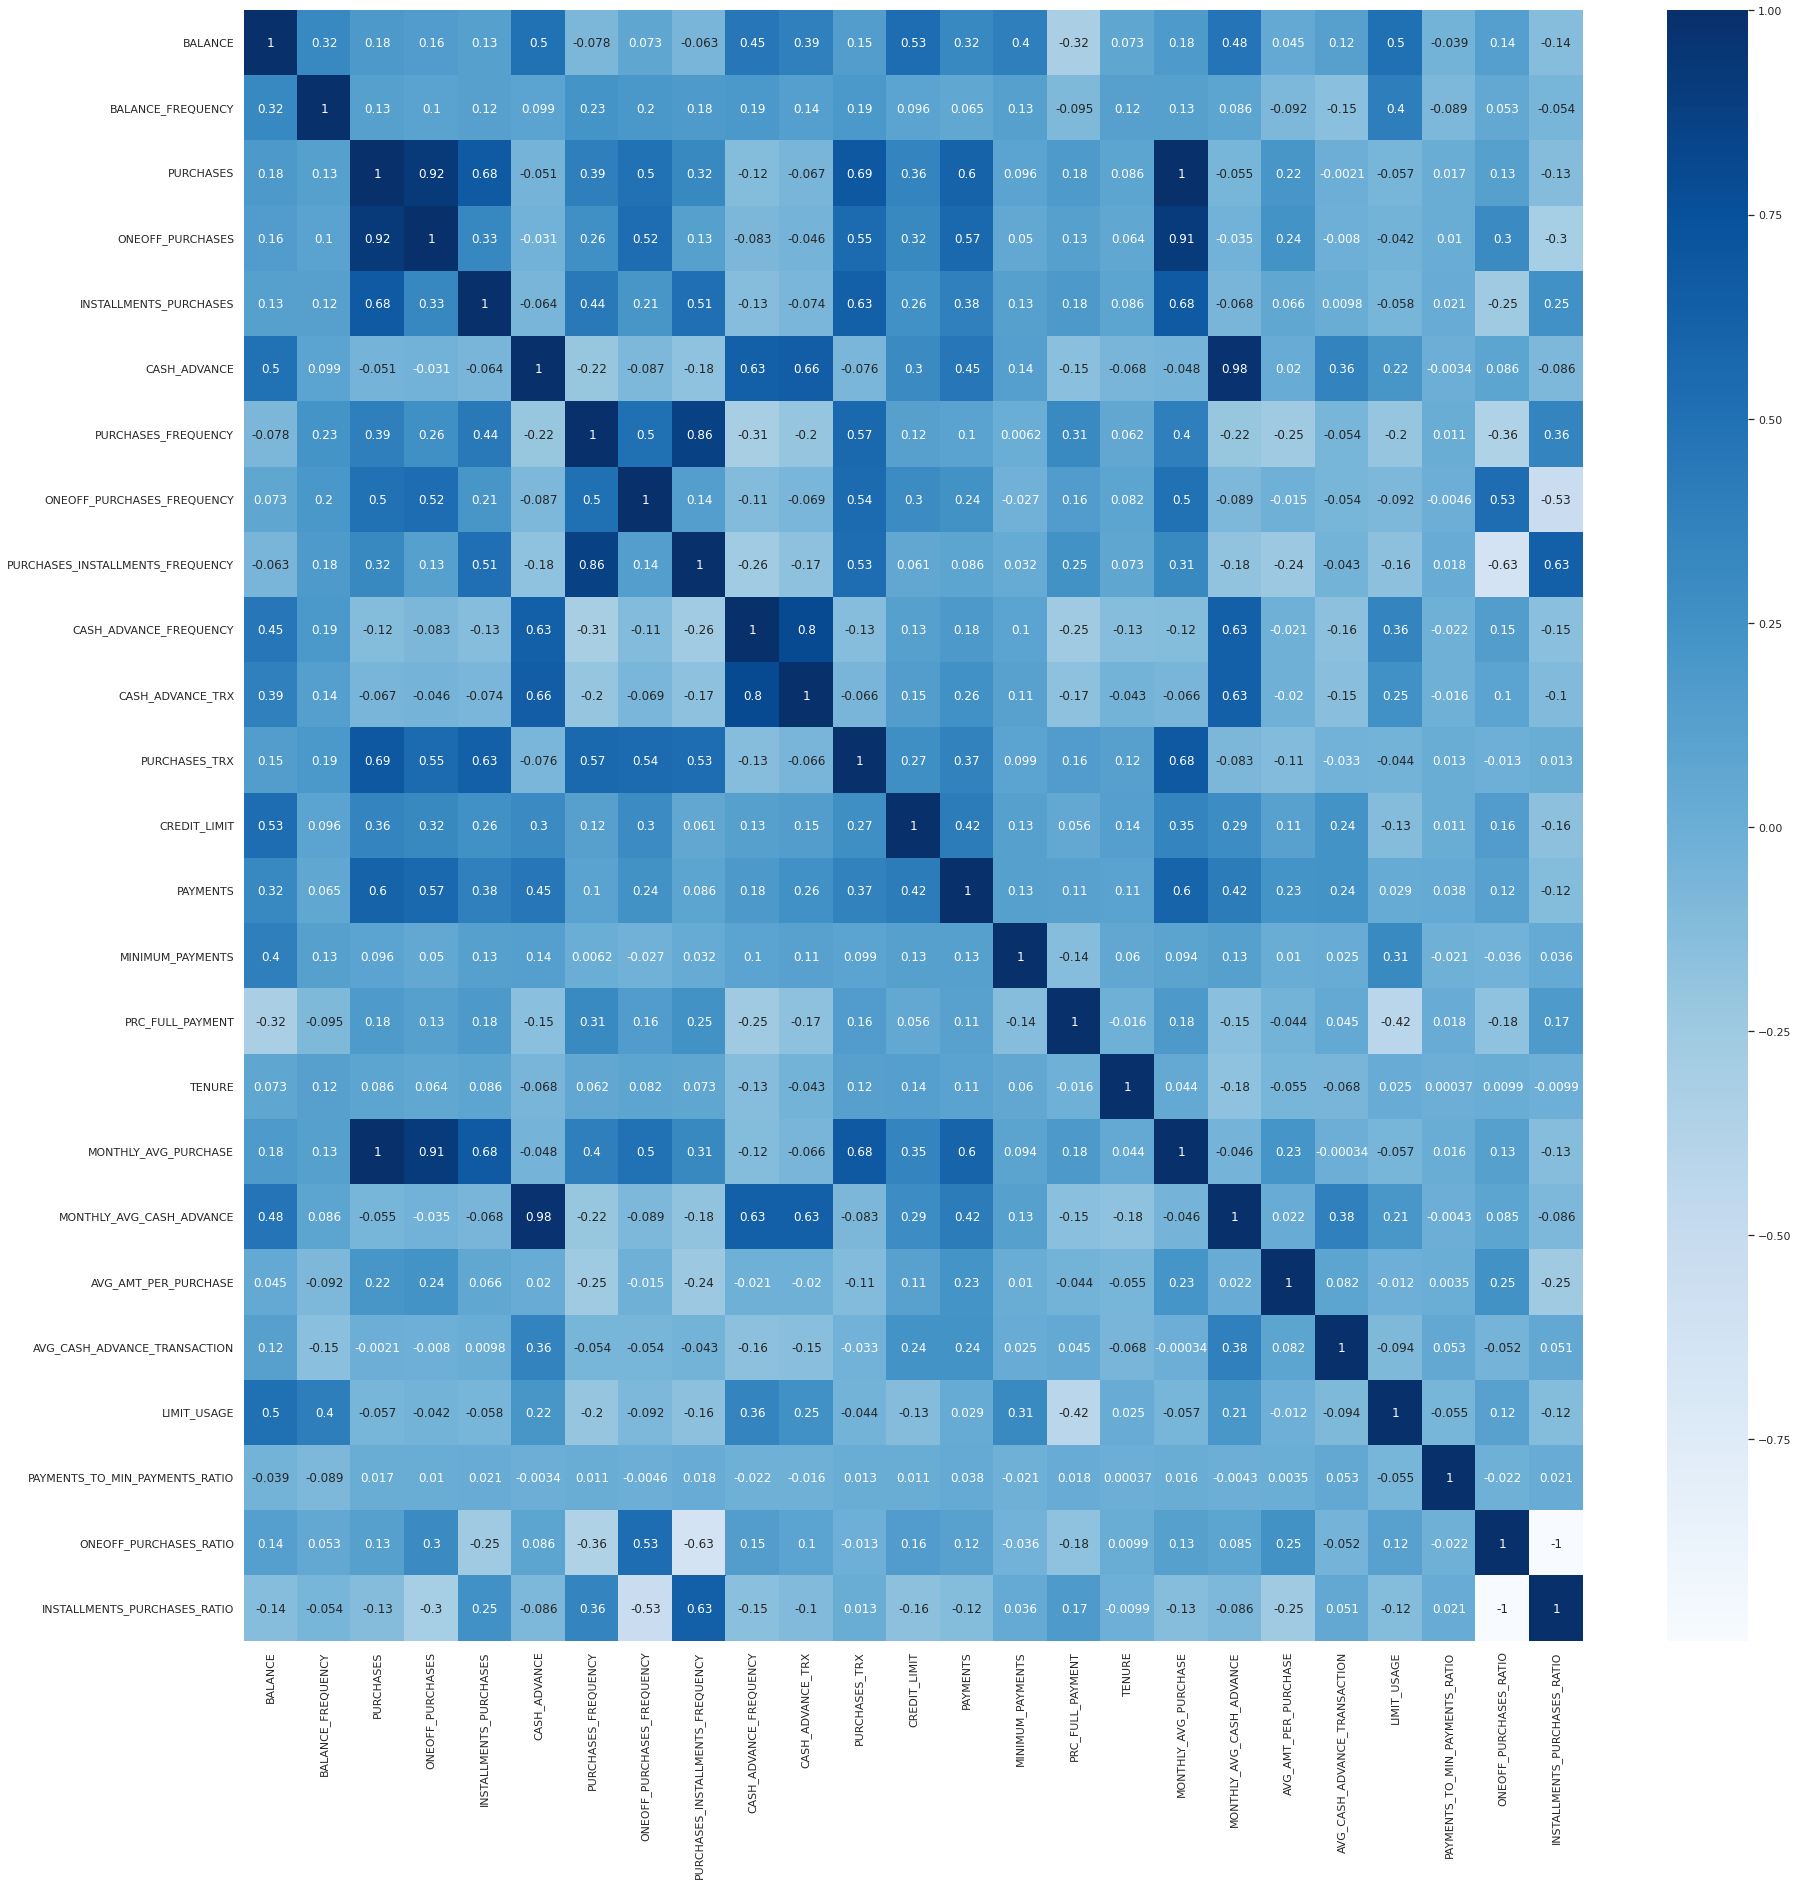

In [57]:
#Correlation Matrix - HEATMAP
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,center = 0 , cmap ='Blues')
plt.show()

In [58]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  ...  PRC_FULL_PAYMENT       TENURE  \
count             8950.000000  ...       8950.000000  8950.000000   
mean                 0.135144  ...          0.153715    11.517318   
std                  0.200121  ...          0.292499     1.338331   
min                  0.000000  ...          0.000000     6.000000   
25%                  0.000000  ...          0.000000    12.000000   
50%                  0.000000  ...          0.000000    12.000000   
75%                  0.222222  ...          0.142857    12.000000   
max                  1.500000  ...          1.000000    12.000000   

       MONTHLY_AVG_PURCHASE  MONTHLY_AVG_CASH_ADVANCE  AVG_AMT_PER_PURCHASE  \
count           8950.000000               8950.000000           6909.000000   
mean              86.175173                 88.977984                   inf   
std              180.508787                193.136115                   NaN   
min                0.000000                  0.000000              0.000000   
25%                3.399375                  0.000000             33.005000   
50%               31.936667                  0.000000             55.458333   
75%               97.228333                 99.085196             94.588442   
max             4086.630833               3928.100980                   inf   

       AVG_CASH_ADVANCE_TRANSACTION  LIMIT_USAGE  \
count                   4322.000000  8950.000000   
mean                     432.600832     0.388884   
std                      705.298519     0.389722   
min                       14.222216     0.000000   
25%                      114.514061     0.041494   
50%                      257.227887     0.302720   
75%                      478.798973     0.717571   
max                    14836.451410    15.909951   

       PAYMENTS_TO_MIN_PAYMENTS_RATIO  ONEOFF_PURCHASES_RATIO  \
count                     8950.000000             6906.000000   
mean                         9.059164                0.492104   
std                        118.180526                0.424172   
min                          

- The balance frequency is updated quite frequently, on average every 0.87 seconds (frequently updated).

- The typical purchase is $1003.

- The average purchase frequency is 0.5.

- The ONEOFF PURCHASES FREQUENCY, PURCHASES INSTALLMENTS FREQUENCY, and CASH ADVANCE FREQUENCY averages are low.

- The average credit card limit for a user is $4494.

- The average user has had credit card service for 11 years.
- There seems to be a weak negative correlation between INSTALLMENTS_PURCHASES_RATIO and PAYMENTS_TO_MIN_PAYMENTS_RATIO. Customers who have higher ratios of installment purchases tend to have lower ratios of payments to minimum payments.

- The pie chart shows the distribution of purchase types in the data. We can see that the majority of purchases are installment purchases, followed by one-off purchases and both (a combination of installment and one-off purchases).

-  The heatmap shows the correlation between the PAYMENTS_TO_MIN_PAYMENTS_RATIO and AVG_AMT_PER_PURCHASE columns. We can see that there is a positive correlation between these two columns, which means that customers who have higher average purchase amounts also tend to have higher payments-to-minimum-payments ratios.

- we can see that the CREDIT_LIMIT column is heavily skewed to the right, with most customers having a credit limit below 10,000. We can also see that the PAYMENTS column has a bimodal distribution, which suggests that there may be two distinct groups of customers with different payment behaviors.


####Fixing outliers and distribution

In [59]:
new_data = df.copy()

In [60]:
new_data = new_data.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])

In [61]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.05))
    return x

new_data=new_data.apply(lambda x: outlier_capping(x))

In [62]:
new_data.isna().sum()

BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           0
PAYMENTS                               0
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                       0
TENURE                                 0
MONTHLY_AVG_PURCHASE                   0
MONTHLY_AVG_CASH_ADVANCE               0
AVG_AMT_PER_PURCHASE                2041
AVG_CASH_ADVANCE_TRANSACTION        4628
LIMIT_USAGE                            0
PAYMENTS_TO_MIN_PAYMENTS_RATIO         0
ONEOFF_PURCHASES_RATIO              2044
INSTALLMENTS_PUR

In [63]:
#Replacing NA values
new_data['AVG_AMT_PER_PURCHASE'].fillna(0, inplace=True)
new_data['AVG_CASH_ADVANCE_TRANSACTION'].fillna(0, inplace=True)
new_data['ONEOFF_PURCHASES_RATIO'].fillna(0, inplace=True)
new_data['INSTALLMENTS_PURCHASES_RATIO'].fillna(0, inplace=True)

In [64]:
new_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   4647.169122             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE  \
0                   0.000000  ...          0.000000    12.0   
1                   0.250000  ...          0.222222    12.0   
2                   0.000000  ...          0.000000    12.0   
3                   0.083333  ...          0.000000    12.0   
4                   0.000000  ...          0.000000    12.0   
...                      ...  ...               ...     ...   
8945                0.000000  ...          0.500000     8.0   
8946                0.000000  ...          0.000000     8.0   
8947                0.000000  ...          0.250000     8.0   
8948                0.166667  ...          0.250000     8.0   
8949                0.333333  ...          0.000000     8.0   

      MONTHLY_AVG_PURCHASE  MONTHLY_AVG_CASH_ADVANCE  AVG_AMT_PER_PURCHASE  \
0                 7.950000                  0.000000             47.700000   
1                 0.000000                425.548562              0.000000   
2                64.430833                  0.000000             64.430833   
3               124.916667                 17.149001            278.554000   
4                 1.333333                  0.000000             16.000000   
...                    ...                       ...                   ...   
8945             48.520000                  0.000000             48.520000   
8946             50.000000                  0.000000             50.000000   
8947             24.066667                  0.000000             28.880000  

In [65]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_data)

# Perform factor analysis
fa = FactorAnalysis(n_components=10)
fa.fit(new_data)
df_fa = pd.DataFrame(fa.transform(new_data))

# Perform k-means clustering on the factor scores
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_fa)
new_data['Cluster'] = kmeans.labels_

In [66]:
new_data['Cluster'] .value_counts()

1    5367
3    1836
4     788
2     662
0     297
Name: Cluster, dtype: int64

In [67]:
df_fa

0         1         2         3         4         5         6  \
0    -1.135990 -0.253677 -0.140890  0.108569 -0.080409 -0.221389 -0.137645   
1     1.059415  1.230117  0.117638  2.456239  1.304250  0.834932  0.265423   
2     0.824767 -0.681049 -0.927020 -0.705994  0.051358 -1.299321 -0.429330   
3     0.741357 -1.226911 -0.647374 -1.314588  1.455504 -0.892127  0.252973   
4    -0.980358  0.195035 -0.179913  0.149647 -0.238967 -0.771040 -0.639669   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -1.123352 -0.236220 -0.011538  0.034250 -0.159123  0.112196 -0.416908   
8946 -1.121577 -0.208861 -0.051980 -0.023416 -0.324487  0.193084  0.113465   
8947 -1.145694 -0.302625 -0.171972  0.037363 -0.025870 -0.092485 -0.259170   
8948 -1.150690 -0.305222 -0.213445  0.158412  0.082758 -0.338796 -0.158086   
8949 -1.015929 -0.168713  0.084884 -0.997522  1.350600 -0.588259  0.183945   

             7         8         9  
0    -0.276280  0.110627  0.059479  
1     2.240012 -0.109986 -0.343955  
2    -0.115557 -0.001286 -0.112983  
3     0.559369 -0.054293  3.096983  
4    -0.243396  0.111112 -0.427273  
...        ...       ...       ...  
8945 -0.276579  0.020200  0.075186  
8946 -0.246954 -0.006397  0.071827  
8947 -0.283083  0.094611 -0.260474  
8948 -0.156596  0.144049 -0.744969  
8949 -0.095830 -0.087589 -0.592091  

[8950 rows x 10 columns]

In [68]:
df_pair_plot=pd.DataFrame(df_fa)

In [69]:
df_pair_plot['Cluster']=kmeans.labels_ #Add cluster column in the data frame

In [70]:
df_pair_plot.head()

0         1         2         3         4         5         6  \
0 -1.135990 -0.253677 -0.140890  0.108569 -0.080409 -0.221389 -0.137645   
1  1.059415  1.230117  0.117638  2.456239  1.304250  0.834932  0.265423   
2  0.824767 -0.681049 -0.927020 -0.705994  0.051358 -1.299321 -0.429330   
3  0.741357 -1.226911 -0.647374 -1.314588  1.455504 -0.892127  0.252973   
4 -0.980358  0.195035 -0.179913  0.149647 -0.238967 -0.771040 -0.639669   

          7         8         9  Cluster  
0 -0.276280  0.110627  0.059479        1  
1  2.240012 -0.109986 -0.343955        2  
2 -0.115557 -0.001286 -0.112983        3  
3  0.559369 -0.054293  3.096983        3  
4 -0.243396  0.111112 -0.427273        1

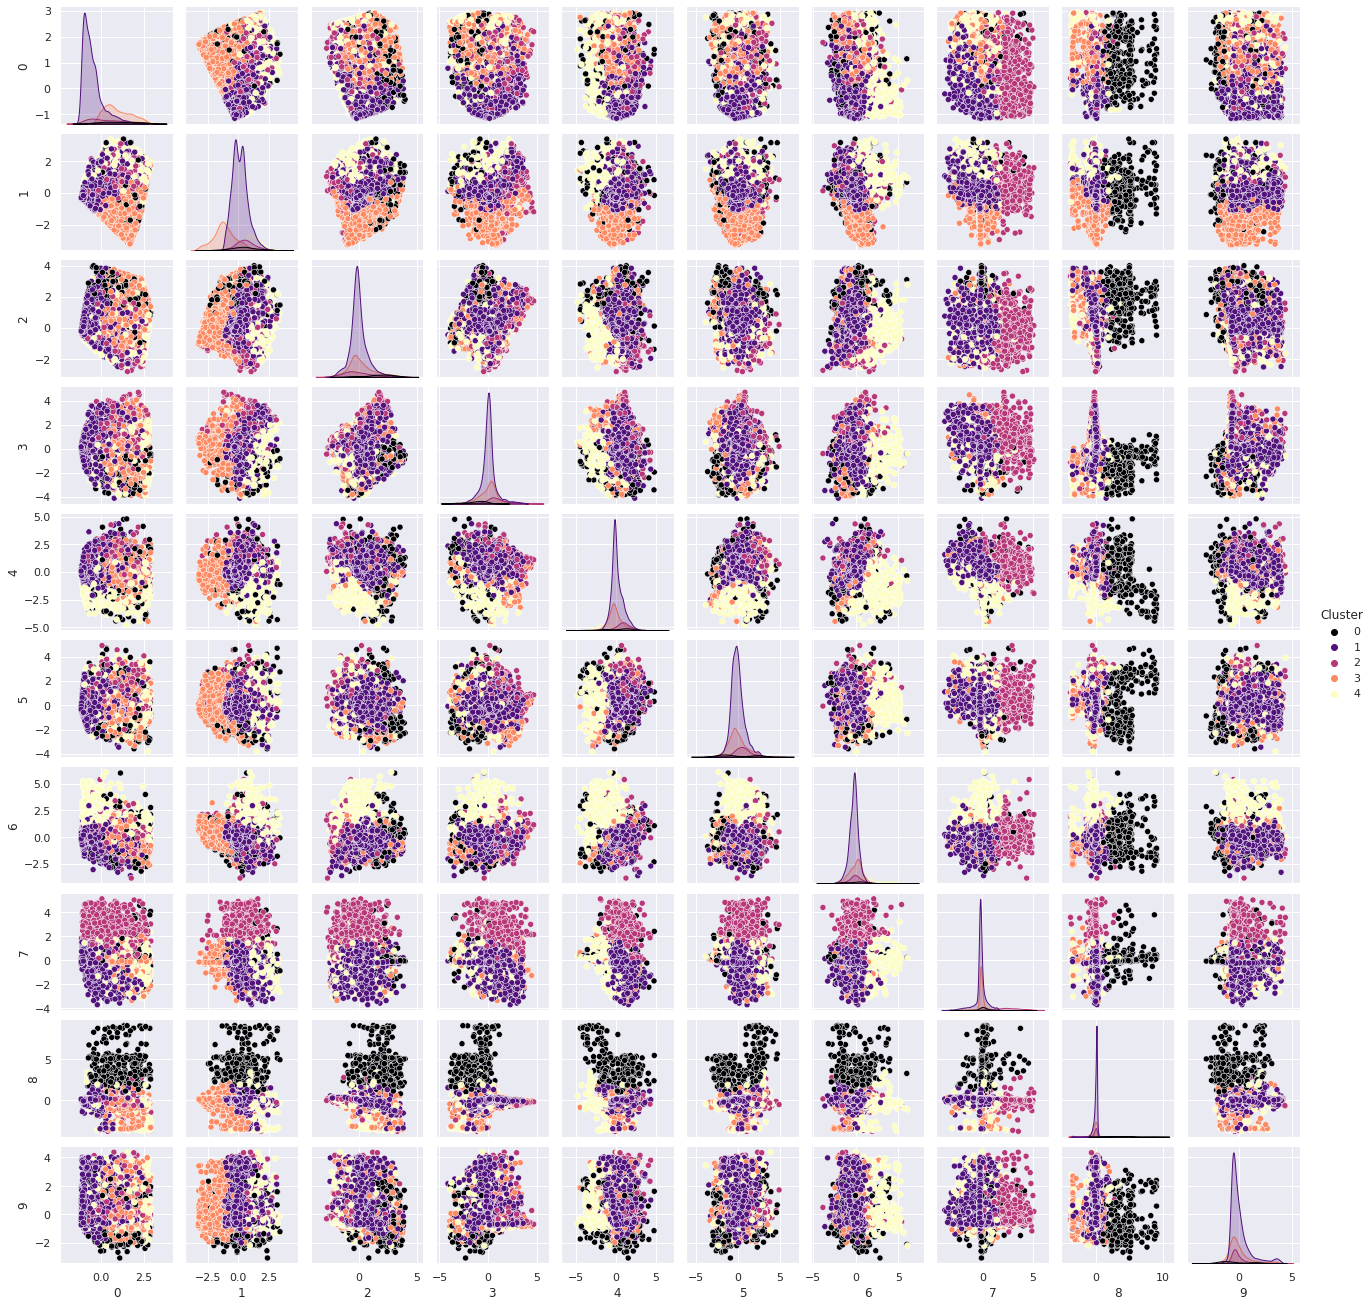

In [71]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'magma', diag_kind='kde',size=1.85)

In [72]:
# Profile the cluster characteristics
cluster_means = new_data.groupby('Cluster').mean()
cluster_means

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        2217.975053           0.963437  3774.385614       1826.208519   
1        1093.829258           0.870844   537.464995        289.083575   
2        2332.981345           0.861785   418.577080        232.427429   
3        1167.493481           0.870589  1263.904097        760.331869   
4        3530.081797           0.985079   977.640791        463.717495   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    813.035455    527.773556             0.856156   
1                    244.652813    661.350868             0.445303   
2                    177.303501   2575.284177             0.249287   
3                    508.660158    372.938615             0.632391   
4                    513.209914   1545.456822             0.530864   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.548582                          0.541431   
1                          0.146449                          0.335548   
2                          0.103304                          0.177843   
3                          0.355404                          0.454625   
4                          0.180416                          0.441115   

         CASH_ADVANCE_FREQUENCY  ...  PRC_FULL_PAYMENT     TENURE  \
Cluster                          ...                                
0                      0.065461  ...          0.317627  11.882155   
1                      0.134326  ...          0.137851  11.477175   
2                      0.170473  ...          0.062754  11.311178   
3                      0.065556  ...          0.261829  11.840959   
4                      0.214175  ...          0.024499  11.831218   

         MONTHLY_AVG_PURCHASE  MONTHLY_AVG_CASH_ADVANCE  AVG_AMT_PER_PURCHASE  \
Cluster                                                                         
0                  319.137638                 45.816531            144.413843   
1                   47.499568                 60.368038             53.039551   
2                   36.485084                233.719185             36.225897   
3                  106.959398                 32.673139             75.434489   
4                   83.099211                135.450022             60.670919   

         AVG_CASH_ADVANCE_TRANSACTION  LIMIT_USAGE  \
Cluster                                              
0                          113.597882     0.338737   
1                          111.630132     0.405715   
2                         1067.822311     0.451916   
3                           65.694396     0.128352   
4                          197.900025     0.791130   

         PAYMENTS_TO_MIN_PAYMENTS_RATIO  ONEOFF_PURCHASES_RATIO  \
Cluster                                                           
0                             10.655545                0.631216   
1                              3.905552                0.344789   
2                              5.165359                0.226560   
3                              6.923040                0.515391   
4                              1.050423                0.333187   

         INSTALLMENTS_PURCHASES_RATIO  
Cluster                                
0                            0.368833  
1                            0.405735  
2                            0.209996  
3                            0.401840  
4                            0.440925  

[5 rows x 25 columns]

###Finding Optimal Clusters

In [73]:
#Identifying the cluster error
range_cluster = range( 1, 21 )
error_clusters = []

for num_clusters in range_cluster:
    clusters = KMeans(num_clusters)
    clusters.fit(df_fa)
    error_clusters.append( clusters.inertia_ )

In [74]:
df_cluster = pd.DataFrame( { "num_clusters":range_cluster, "cluster_errors": error_clusters } )

df_cluster[0:21]

num_clusters  cluster_errors
0              1   100312.193205
1              2    85043.090099
2              3    77547.910350
3              4    70754.038112
4              5    64122.597465
5              6    59896.365585
6              7    56005.452706
7              8    52502.522466
8              9    50265.484691
9             10    48087.951553
10            11    45966.223014
11            12    43914.134297
12            13    42432.242382
13            14    40964.885338
14            15    39774.679523
15            16    38970.800233
16            17    37813.912668
17            18    36933.728090
18            19    36302.776546
19            20    35809.323456

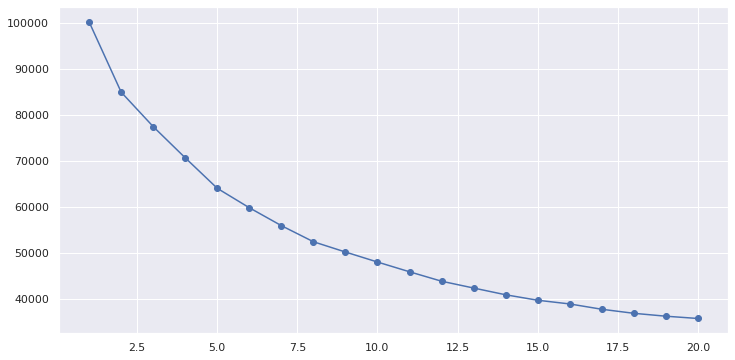

In [75]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( df_cluster.num_clusters, df_cluster.cluster_errors, marker = "o" )

***From above graph, the elbow range is 4, 5, 6***

### Silhouette Coefficient

In [76]:
from sklearn import metrics

In [77]:
# calculate SC
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df_fa)
    scores.append(metrics.silhouette_score(df_fa, km.labels_))

In [78]:
scores

[0.25326467197056846,
 0.2685890573200538,
 0.26640938450892593,
 0.2840775086633753,
 0.2821925435659399,
 0.2855363414026009,
 0.2890946717376161,
 0.2901954966482972,
 0.27214187960355796,
 0.27671529048112276,
 0.27942009021979314,
 0.27402753459283063,
 0.2768059476211136,
 0.2808960115874327,
 0.20013662340604546,
 0.1993397053503166,
 0.20589717700207916,
 0.19094317284315995,
 0.1902723430160775]

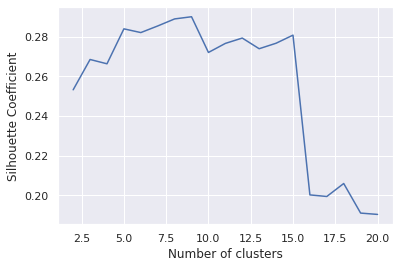

In [79]:
# plotting the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [80]:
df_fa

0         1         2         3         4         5         6  \
0    -1.135990 -0.253677 -0.140890  0.108569 -0.080409 -0.221389 -0.137645   
1     1.059415  1.230117  0.117638  2.456239  1.304250  0.834932  0.265423   
2     0.824767 -0.681049 -0.927020 -0.705994  0.051358 -1.299321 -0.429330   
3     0.741357 -1.226911 -0.647374 -1.314588  1.455504 -0.892127  0.252973   
4    -0.980358  0.195035 -0.179913  0.149647 -0.238967 -0.771040 -0.639669   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -1.123352 -0.236220 -0.011538  0.034250 -0.159123  0.112196 -0.416908   
8946 -1.121577 -0.208861 -0.051980 -0.023416 -0.324487  0.193084  0.113465   
8947 -1.145694 -0.302625 -0.171972  0.037363 -0.025870 -0.092485 -0.259170   
8948 -1.150690 -0.305222 -0.213445  0.158412  0.082758 -0.338796 -0.158086   
8949 -1.015929 -0.168713  0.084884 -0.997522  1.350600 -0.588259  0.183945   

             7         8         9  Cluster  
0    -0.276280  0.110627  0.059479        1  
1     2.240012 -0.109986 -0.343955        2  
2    -0.115557 -0.001286 -0.112983        3  
3     0.559369 -0.054293  3.096983        3  
4    -0.243396  0.111112 -0.427273        1  
...        ...       ...       ...      ...  
8945 -0.276579  0.020200  0.075186        1  
8946 -0.246954 -0.006397  0.071827        1  
8947 -0.283083  0.094611 -0.260474        1  
8948 -0.156596  0.144049 -0.744969        1  
8949 -0.095830 -0.087589 -0.592091        1  

[8950 rows x 11 columns]

In [81]:
df_pair_plot=pd.DataFrame(df_fa)

In [82]:
df_pair_plot['Cluster']=kmeans.labels_ #Add cluster column in the data frame

In [83]:
df_pair_plot.head()

0         1         2         3         4         5         6  \
0 -1.135990 -0.253677 -0.140890  0.108569 -0.080409 -0.221389 -0.137645   
1  1.059415  1.230117  0.117638  2.456239  1.304250  0.834932  0.265423   
2  0.824767 -0.681049 -0.927020 -0.705994  0.051358 -1.299321 -0.429330   
3  0.741357 -1.226911 -0.647374 -1.314588  1.455504 -0.892127  0.252973   
4 -0.980358  0.195035 -0.179913  0.149647 -0.238967 -0.771040 -0.639669   

          7         8         9  Cluster  
0 -0.276280  0.110627  0.059479        1  
1  2.240012 -0.109986 -0.343955        2  
2 -0.115557 -0.001286 -0.112983        3  
3  0.559369 -0.054293  3.096983        3  
4 -0.243396  0.111112 -0.427273        1

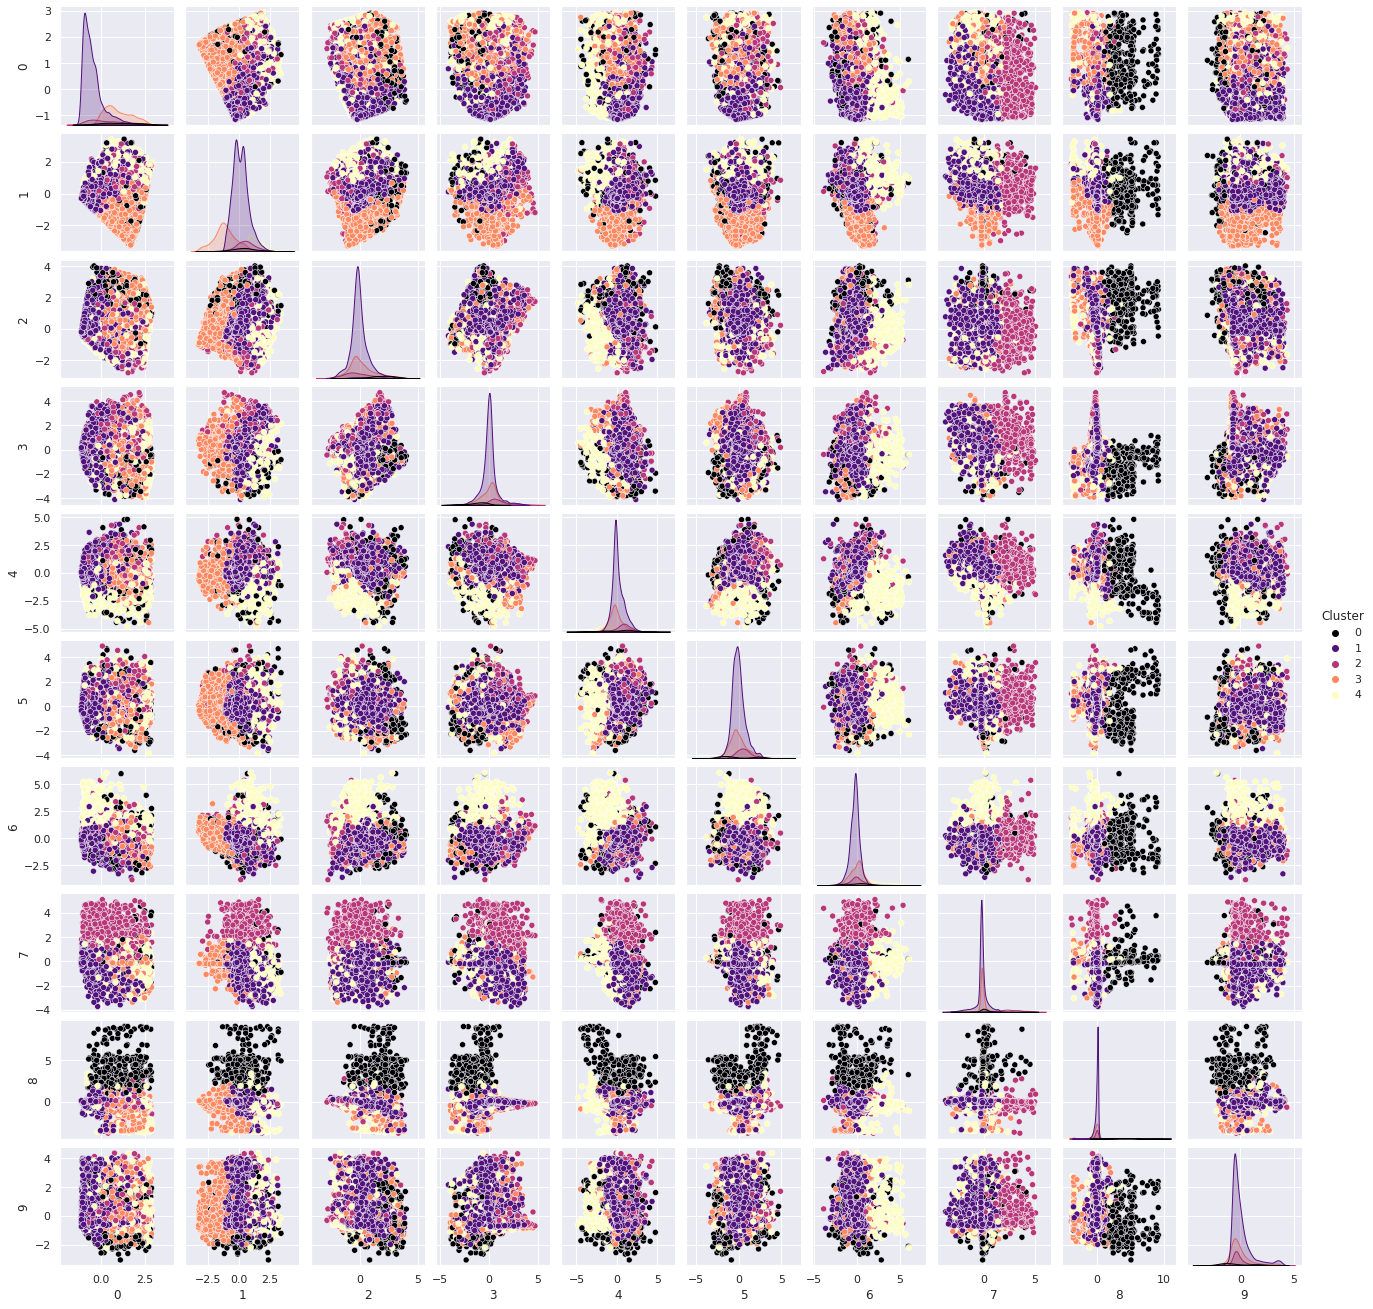

In [84]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'magma', diag_kind='kde',size=1.85)

In [85]:
# Preparing KPIs For Evaluation

col_kpi=['INSTALLMENTS_PURCHASES', 'BALANCE','PAYMENTS_TO_MIN_PAYMENTS_RATIO', 'PURCHASES_TRX','MONTHLY_AVG_PURCHASE','MONTHLY_AVG_CASH_ADVANCE','AVG_AMT_PER_PURCHASE','CASH_ADVANCE_TRX',
         'AVG_CASH_ADVANCE_TRANSACTION','LIMIT_USAGE','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES','BALANCE_FREQUENCY','CREDIT_LIMIT']

In [86]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([new_data[col_kpi],pd.Series(kmeans.labels_,name='Cluster_4')],axis=1)

In [87]:
cluster_df_4.head()

INSTALLMENTS_PURCHASES      BALANCE  PAYMENTS_TO_MIN_PAYMENTS_RATIO  \
0                    95.4    40.900749                        1.446508   
1                     0.0  3202.467416                        3.826241   
2                     0.0  2495.148862                        0.991682   
3                     0.0  1666.670542                        0.277366   
4                     0.0   817.714335                        2.771075   

   PURCHASES_TRX  MONTHLY_AVG_PURCHASE  MONTHLY_AVG_CASH_ADVANCE  \
0            2.0              7.950000                  0.000000   
1            0.0              0.000000                425.548562   
2           12.0             64.430833                  0.000000   
3            1.0            124.916667                 17.149001   
4            1.0              1.333333                  0.000000   

   AVG_AMT_PER_PURCHASE  CASH_ADVANCE_TRX  AVG_CASH_ADVANCE_TRANSACTION  \
0             47.700000               0.0                      0.000000   
1              0.000000               4.0                   1365.146742   
2             64.430833               0.0                      0.000000   
3            278.554000               1.0                    205.788017   
4             16.000000               0.0                      0.000000   

   LIMIT_USAGE  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  INSTALLMENTS_PURCHASES  \
0     0.040901        139.509787          0.000000                    95.4   
1     0.457495       1072.340217          0.222222                     0.0   
2     0.332687        627.284787          0.000000                     0.0   
3     0.222223        312.343947          0.000000                     0.0   
4     0.681429        244.791237          0.000000                     0.0   

   ONEOFF_PURCHASES  BALANCE_FREQUENCY  CREDIT_LIMIT  Cluster_4  
0              0.00           0.818182        1000.0          1  
1              0.00           0.909091        7000.0          2  
2            773.17           1.000000        7500.0          3  
3           1499.00           0.636364        7500.0          3  
4             16.00           1.000000        1200.0          1

In [88]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4                                 0            1            2  \
INSTALLMENTS_PURCHASES           813.035455   244.652813   177.303501   
INSTALLMENTS_PURCHASES           813.035455   244.652813   177.303501   
BALANCE                         2217.975053  1093.829258  2332.981345   
PAYMENTS_TO_MIN_PAYMENTS_RATIO    10.655545     3.905552     5.165359   
PURCHASES_TRX                     37.161616     9.460034     6.158610   
MONTHLY_AVG_PURCHASE             319.137638    47.499568    36.485084   
MONTHLY_AVG_CASH_ADVANCE          45.816531    60.368038   233.719185   
AVG_AMT_PER_PURCHASE             144.413843    53.039551    36.225897   
CASH_ADVANCE_TRX                   1.673401     2.856531     2.658610   
AVG_CASH_ADVANCE_TRANSACTION     113.597882   111.630132  1067.822311   
LIMIT_USAGE                        0.338737     0.405715     0.451916   
MINIMUM_PAYMENTS                 931.806318   418.717354   782.685000   
PRC_FULL_PAYMENT                   0.317627     0.137851     0.062754   
INSTALLMENTS_PURCHASES           813.035455   244.652813   177.303501   
INSTALLMENTS_PURCHASES           813.035455   244.652813   177.303501   
ONEOFF_PURCHASES                1826.208519   289.083575   232.427429   
BALANCE_FREQUENCY                  0.963437     0.870844     0.861785   
CREDIT_LIMIT                    7055.555556  2665.935082  5420.090634   

Cluster_4                                 3            4  
INSTALLMENTS_PURCHASES           508.660158   513.209914  
INSTALLMENTS_PURCHASES           508.660158   513.209914  
BALANCE                         1167.493481  3530.081797  
PAYMENTS_TO_MIN_PAYMENTS_RATIO     6.923040     1.050423  
PURCHASES_TRX                     18.964597    16.265228  
MONTHLY_AVG_PURCHASE             106.959398    83.099211  
MONTHLY_AVG_CASH_ADVANCE          32.673139   135.450022  
AVG_AMT_PER_PURCHASE              75.434489    60.670919  
CASH_ADVANCE_TRX                   1.379085     5.493655  
AVG_CASH_ADVANCE_TRANSACTION      65.694396   197.900025  
LIMIT_USAGE                        0.128352     0.791130  
MINIMUM_PAYMENTS                 398.451234  2361.576022  
PRC_FULL_PAYMENT                   0.261829     0.024499  
INSTALLMENTS_PURCHASES           508.660158   513.209914  
INSTALLMENTS_PURCHASES           508.660158   513.209914  
ONEOFF_PURCHASES                 760.331869   463.717495  
BALANCE_FREQUENCY                  0.870589     0.985079  
CREDIT_LIMIT                    8081.211626  5395.177665

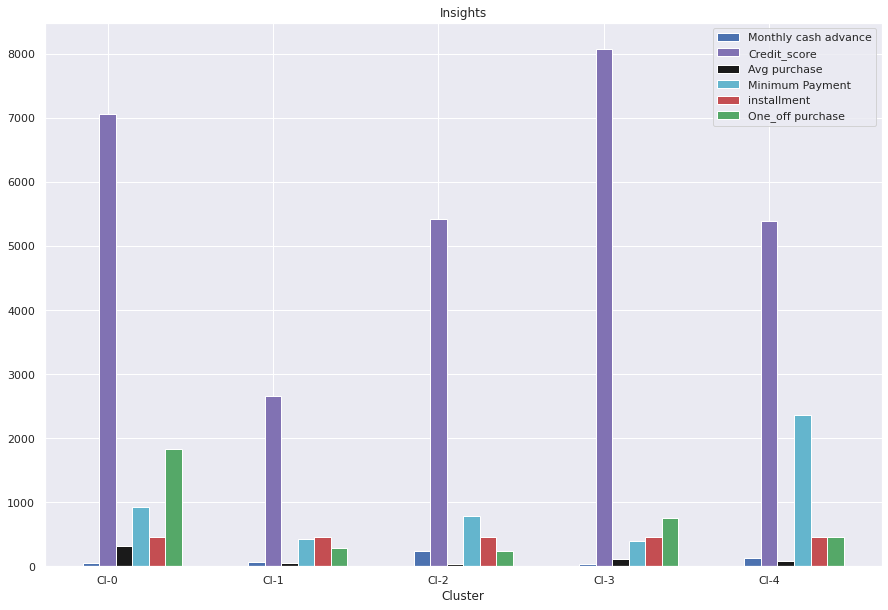

In [89]:
#Plotting Clusters
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=cluster_4.loc['MONTHLY_AVG_CASH_ADVANCE',:].values
credit_score=cluster_4.loc['CREDIT_LIMIT',:].values
purchase= cluster_4.loc['MONTHLY_AVG_PURCHASE',:].values
payment=cluster_4.loc['MINIMUM_PAYMENTS',:].values
installment=cluster_4.loc['INSTALLMENTS_PURCHASES',:].values
one_off=cluster_4.loc['ONEOFF_PURCHASES',:].values

# Calculate the mean of installment
installment_mean = np.mean(installment)

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Minimum Payment',width=bar_width)

# Pass the scalar value to plt.bar() instead of the array
b5=plt.bar(index+4*bar_width,installment_mean,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3', 'Cl-4', 'Cl-5', 'Cl-6' ))
plt.legend()





**Insights**

#### Clusters are clearly distinguishing behavior within customers

<big>

-  Cluster 0 customers have the highest number of One Off transactions and the lowest payment ratio. *** This group accounts for approximately 21% of the total customer base.

- Cluster 1 takes the most advance cash and pays the smallest minimum payment, has a low credit score, and makes no purchases. This group accounts for approximately 23% of the total customer base.

- Cluster 2 is the group of customers with the highest Monthly avg purchases and who make both installment and one time purchases and have a relatively good credit score. This group accounts for approximately 31% of the total customer base.

- Cluster 3 customers have the best credit scores, pay their bills on time, and make the most installment purchases. *** This group accounts for about 25% of the total customer base.
- Cluster 4 customer has the highest minimum payment.

---



In [90]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0     297
1          1    5367
2          2     662
3          3    1836
4          4     788
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0   297    3.318436
1  5367   59.966480
2   662    7.396648
3  1836   20.513966
4   788    8.804469


#### Finding behaviour with 5 Clusters:

In [91]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(df_scaled)
km_5.labels_

array([4, 2, 3, ..., 4, 0, 3], dtype=int32)

In [92]:
pd.Series(km_5.labels_).value_counts()

4    2716
3    1899
0    1888
1    1249
2    1198
dtype: int64

Text(0, 0.5, 'PC_1')

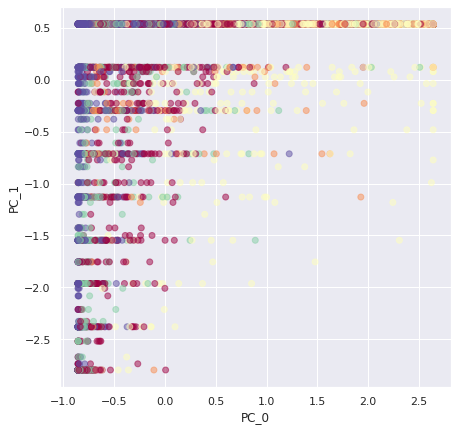

In [93]:
plt.figure(figsize=(7,7))
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [94]:
cluster_df_5=pd.concat([new_data[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [95]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5                                 0            1            2  \
INSTALLMENTS_PURCHASES            14.427876  1019.037580   185.725680   
INSTALLMENTS_PURCHASES            14.427876  1019.037580   185.725680   
BALANCE                         1445.752690  1958.096729  3917.973381   
PAYMENTS_TO_MIN_PAYMENTS_RATIO     3.084980     9.639750     3.580460   
PURCHASES_TRX                      0.797669    40.673339     7.172788   
MONTHLY_AVG_PURCHASE               3.070230   262.637442    40.248586   
MONTHLY_AVG_CASH_ADVANCE          91.857107    37.650134   321.978693   
AVG_AMT_PER_PURCHASE               8.347247    96.716182    49.393810   
CASH_ADVANCE_TRX                   4.315148     1.515612     9.679466   
AVG_CASH_ADVANCE_TRANSACTION     325.401140   105.686270   529.005319   
LIMIT_USAGE                        0.578659     0.305418     0.613873   
MINIMUM_PAYMENTS                 583.053965   754.705877  1401.787835   
PRC_FULL_PAYMENT                   0.039219     0.284965     0.037335   
INSTALLMENTS_PURCHASES            14.427876  1019.037580   185.725680   
INSTALLMENTS_PURCHASES            14.427876  1019.037580   185.725680   
ONEOFF_PURCHASES                  19.576658  1833.449220   256.335407   
BALANCE_FREQUENCY                  0.888907     0.971914     0.954195   
CREDIT_LIMIT                    2832.079802  6974.925395  7182.265898   

Cluster_5                                 3            4  
INSTALLMENTS_PURCHASES            56.041896   508.566593  
INSTALLMENTS_PURCHASES            56.041896   508.566593  
BALANCE                          886.205259   532.804332  
PAYMENTS_TO_MIN_PAYMENTS_RATIO     4.372788     3.912331  
PURCHASES_TRX                      8.003686    13.778719  
MONTHLY_AVG_PURCHASE              59.635982    51.704537  
MONTHLY_AVG_CASH_ADVANCE          14.982335     8.989031  
AVG_AMT_PER_PURCHASE             109.351980    49.503250  
CASH_ADVANCE_TRX                   0.796735     0.478645  
AVG_CASH_ADVANCE_TRANSACTION      66.441170    40.514113  
LIMIT_USAGE                        0.313138     0.232792  
MINIMUM_PAYMENTS                 411.731996   416.039744  
PRC_FULL_PAYMENT                   0.096533     0.264262  
INSTALLMENTS_PURCHASES            56.041896   508.566593  
INSTALLMENTS_PURCHASES            56.041896   508.566593  
ONEOFF_PURCHASES                 619.162174    73.388638  
BALANCE_FREQUENCY                  0.827984     0.845899  
CREDIT_LIMIT                    4041.353663  3218.941272

### Conclusion With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side


---
 
<big>

***So we don't have quite distinguishable characteristics with 5 clusters***

In [96]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    1888
1          1    1249
2          2    1198
3          3    1899
4          4    2716
Name: Cluster_5, dtype: int64


In [97]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1888   21.094972
1  1249   13.955307
2  1198   13.385475
3  1899   21.217877
4  2716   30.346369


### Finding behavior with 6 clusters

In [98]:
km_6=KMeans(n_clusters=6).fit(df_scaled)
km_6.labels_

array([0, 1, 2, ..., 0, 4, 2], dtype=int32)

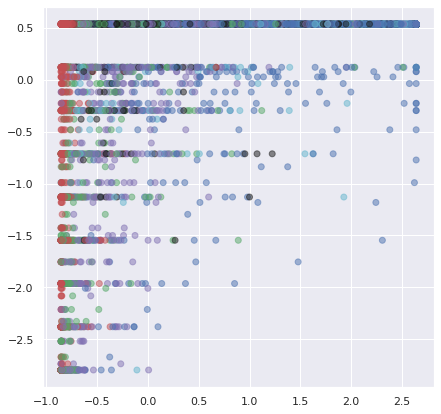

In [99]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [100]:
cluster_df_6 = pd.concat([new_data[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [101]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6                                 0            1            2  \
INSTALLMENTS_PURCHASES           455.911002   141.633840    50.963107   
INSTALLMENTS_PURCHASES           455.911002   141.633840    50.963107   
BALANCE                          134.807082  3929.668124   858.605860   
PAYMENTS_TO_MIN_PAYMENTS_RATIO     4.947205     3.721916     4.421445   
PURCHASES_TRX                     11.786006     6.175676     7.772777   
MONTHLY_AVG_PURCHASE              45.809900    36.547882    59.483917   
MONTHLY_AVG_CASH_ADVANCE           2.406396   334.118181    14.662954   
AVG_AMT_PER_PURCHASE              49.622997    48.318094   110.883974   
CASH_ADVANCE_TRX                   0.112360     9.908108     0.772234   
AVG_CASH_ADVANCE_TRANSACTION      13.658331   538.676917    65.245495   
LIMIT_USAGE                        0.051356     0.604916     0.302139   
MINIMUM_PAYMENTS                 171.232643  1377.234391   397.472749   
PRC_FULL_PAYMENT                   0.369210     0.038641     0.097326   
INSTALLMENTS_PURCHASES           455.911002   141.633840    50.963107   
INSTALLMENTS_PURCHASES           455.911002   141.633840    50.963107   
ONEOFF_PURCHASES                  53.143381   255.589328   621.824074   
BALANCE_FREQUENCY                  0.780747     0.951542     0.827993   
CREDIT_LIMIT                    3421.932837  7309.418509  4069.729179   

Cluster_6                                 3            4            5  
INSTALLMENTS_PURCHASES          1001.391259     7.927249   667.484173  
INSTALLMENTS_PURCHASES          1001.391259     7.927249   667.484173  
BALANCE                         1915.677829  1431.691002  1861.723205  
PAYMENTS_TO_MIN_PAYMENTS_RATIO    10.152226     3.045900     1.801680  
PURCHASES_TRX                     41.019231     0.600218    20.065217  
MONTHLY_AVG_PURCHASE             270.204560     2.345927    77.838757  
MONTHLY_AVG_CASH_ADVANCE          37.592216    93.114339    40.134744  
AVG_AMT_PER_PURCHASE              98.324336     7.568016    53.118389  
CASH_ADVANCE_TRX                   1.486014     4.348584     2.006616  
AVG_CASH_ADVANCE_TRANSACTION     102.071401   328.515464   143.104756  
LIMIT_USAGE                        0.285739     0.575934     0.683225  
MINIMUM_PAYMENTS                 717.757060   565.643884  1113.458101  
PRC_FULL_PAYMENT                   0.303246     0.034691     0.018777  
INSTALLMENTS_PURCHASES          1001.391259     7.927249   667.484173  
INSTALLMENTS_PURCHASES          1001.391259     7.927249   667.484173  
ONEOFF_PURCHASES                1941.373309    17.620724   209.315624  
BALANCE_FREQUENCY                  0.972166     0.889956     0.989845  
CREDIT_LIMIT                    7150.595995  2819.644154  3218.194707

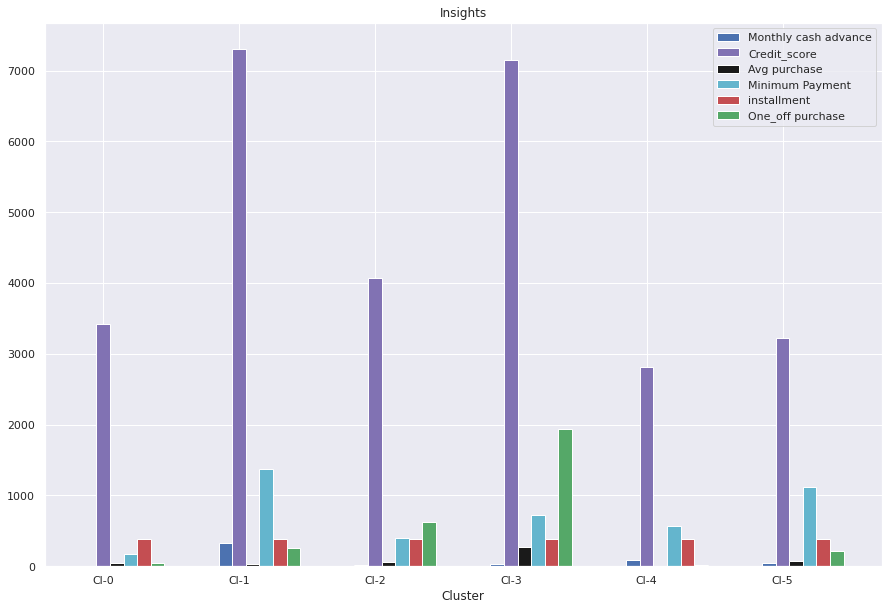

In [102]:
#Plotting Clusters
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=six_cluster.loc['MONTHLY_AVG_CASH_ADVANCE',:].values
credit_score=six_cluster.loc['CREDIT_LIMIT',:].values
purchase= six_cluster.loc['MONTHLY_AVG_PURCHASE',:].values
payment=six_cluster.loc['MINIMUM_PAYMENTS',:].values
installment=six_cluster.loc['INSTALLMENTS_PURCHASES',:].values
one_off=six_cluster.loc['ONEOFF_PURCHASES',:].values

# Calculate the mean of installment
installment_mean = np.mean(installment)

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Minimum Payment',width=bar_width)

# Pass the scalar value to plt.bar() instead of the array
b5=plt.bar(index+4*bar_width,installment_mean,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3', 'Cl-4', 'Cl-5', 'Cl-6' ))
plt.legend()





In [103]:
cash_advance=np.log(six_cluster.loc['MONTHLY_AVG_CASH_ADVANCE',:].values)
credit_score=list(six_cluster.loc['LIMIT_USAGE',:].values)
cash_advance

array([0.87813016, 5.81149477, 2.68532418, 3.62679701, 4.53382819,
       3.6922424 ])

In [104]:
from sklearn.metrics import silhouette_score
score={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(df_scaled)
    score[n]=silhouette_score(df_scaled,km_score.labels_)

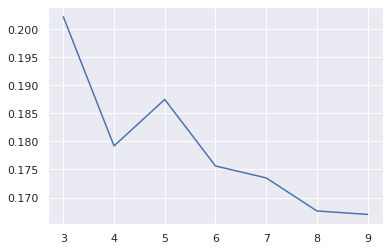

In [105]:
pd.Series(score).plot()

**Performance metrics also suggest that  K-means with 5 cluster is able to show distinguished characteristics of each cluster.**



### Marketing Strategy Suggested:

#### Group 0 - This group has a low paying ratio and only uses the card for one-time transactions (may be for utility bills only). This group appears to be risky.
       
#### Group 1 - They have bad credit and only accept cash in advance. We can target them by offering lower interest rates on purchases.
   
#### Group 2 - They are potential target customers who pay their dues, make purchases, and have a relatively good credit score) — we can increase credit limit or lower interest rate.
   
####  Group 3
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       
- They are potential target customers who pay their dues, make purchases, and have a relatively good credit score) — we can increase credit limit or lower interest rate.
— To increase transactions, premium cards/loyalty cards can be issued. 


#### Group 4 - This group outperforms the others because customers maintain good credit and pay their bills on time.
— Giving them reward points will encourage them to make more purchases.

In [ ]:
.
